In [2]:
# TO DO'S:
# NA divisão em treino e teste, ver como habilitar a opção de fazer a divisão equilibrada para a variável resposta (pois ela é desbalanceada)
# Colocar títulos nos gráficos, para eu me localizar melhor
# Passos futuros (feature engineering)

### Índice

1. [Introdução](#Construção-das-Bases)
2. [Base de Dados](#Base-de-Dados)
3. [Retirar Colunas](#Retirar-Colunas)
4. [Filtrando Dados](#Filtrando-Dados)
5. [Estrutura](#Estrutura)
    1. País
    2. [Ano](#Ano)
    3. [Rede Social](#Rede-Social)
    4. Tabela Combinatória
        1. [Adicionando Casos de Banimento](#Adicionando-Casos-de-Banimento)
        2. [Combinando Dados](#Combinando-Dados)
        3. [Juntando as Bases](#Juntando-as-Bases)
    5. Análise simples dos dados até o momento
    6. [Tabela Auxiliar: ISO Codes](#Tabela-Auxiliar:-ISO-Codes)
6. Adicionando variáveis
    1. [V-Dem](#V-Dem)
    2. [Unindo as tabelas](#Unindo-as-tabelas)
    3. Variação Democrática
    4. Adicionando Dados: População e PIB
7. Análise dos dados
8. [Data Prep](#Data-Prep)
    1. Divisão Democrático X Autocrático
    2. Divisão Treino X Teste
    3. [Pipeline](#Pipeline)
9. [Modelagem](#Modelagem)
    1. Regressão Logística
        1. [Democracias](#Democracias)
            1. Treino
            2. Teste
        2. Autocracias
            1. Treino
            2. Teste 
        3. Geral
            1. Treino
            2. Teste
        4. Cross-Comparison
            1. Modelo Democrático
            2. Modelo Autocrático
            3. Modelo Geral
    2. Árvore de Decisão
        1. Democracias
            1. Treino
            2. Teste
        2. Autocracias
            1. Treino
            2. Teste
        3. Geral
            1. Treino
            2. Teste
        4. Cross-Comparison
            1. Modelo Democrático
            2. Modelo Autocrático
            3. Modelo Geral
    3. [Random Forest](#Random-Forest)
        1. Democracias
            1. Treino
            2. Teste
        2. Autocracias
            1. Treino
            2. Teste 
        3. Geral
            1. Treino
            2. Teste
        4. Cross-Comparison
            1. Modelo Democrático
            2. Modelo Autocrático
            3. Modelo Geral

# Construção das Bases
## Trabalho de Conclusão de Curso
### Leonardo Stempfle de Azevedo

**Objetivo**

Explicar o banimento de redes sociais em países democráticos com base em variáveis econômicas, sociais e políticas, utilizando um modelo (e.g. Regressão Logística, Árvore de Decisão) treinado em casos de países não-democráticos.

**Base(s) de dados**

_Projeto:_ Internet Censorship Tracker

_Nome da base de dados:_ Internet censorship cases across the world

_Autor:_ Surfshark

**Dados a serem adicionados:**
* Variáveis políticas
    * Índices e determinantes de democracia
        * Grau de liberdade de expressão
        * Existência de eleições livres
        * Alternância de poder
        * Liberdade da mídia
    
* Variáveis sociais
    * Religião majoritária
    * Nível de escolarização
    * Digitalização / Acesso à internet
    
* Variáveis econômicas e socioeconômicas
    * PIB

**Modelos utilizados:**

1. Regressão Logística Multivariada
2. Árvore de Decisão

Esses modelos são simples, mas possuem caráter explicativo, não somente preditivo, visto que o caráter deste trabalho é a explicação do fenômeno e, em menor grau, a criação de um modelo preditivo.

# Base de Dados

In [3]:
!pip install pandas
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_excel("Preparado - Internet censorship cases across the world_last update November 12th 2024.xlsx",
                   sheet_name = "Countries") # lembrar de baixar a base atualizada
df_inalterado = df.copy(deep = True) # se necessário fazer alguma análise ou comparação com o dados antes do tratamento

In [6]:
df.head(10)

,Country,ISO-alpha2 Code,Social media bans / heavy disruptions within the period of 2015 - present?,Related w/ protests,Related w/ elections,Related w/ political turmoil,Related w/ country’s internet law,Start date,End date,"Duration, h (ongoing cases are responsive to update date)",...,Scope/population?,Service based restriction,Facebook,X (formerly Twitter),Youtube,Instagram,Telegram,Whatsapp,Other soc. media,Other VoIP apps
0,Algeria,DZ,Yes,True,False,False,False,2019-09-14,2019-09-14 00:00:00,1.0,...,Nationwide,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,False,False,True,False,2019-08-08,2019-08-08 00:00:00,3.0,...,Nationwide,True,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,NaN,NaN,NaN,True,False,False,False,2019-06-16,2019-06-20 00:00:00,120.0,...,Nationwide,True,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
3,NaN,NaN,NaN,True,False,False,False,2019-03-01,2019-03-01 00:00:00,3.0,...,Nationwide,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,NaN,NaN,True,False,False,False,2019-02-22,2019-02-25 00:00:00,69.0,...,Nationwide,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Angola,AO,No evidence,False,False,False,False,NaT,NaN,NaN,...,NaN,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Benin,BJ,Yes,False,True,False,False,2019-05-01,2019-05-01 00:00:00,15.0,...,Nationwide,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,NaN,NaN,NaN,True,False,False,False,2019-04-28,2019-04-28 00:00:00,1.0,...,Nationwide,True,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
8,Botswana,BW,No evidence,False,False,False,False,NaT,NaN,NaN,...,NaN,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Burkina Faso,BF,Social media currently restricted,False,False,True,False,2022-01-23,2022-01-24 00:00:00,35.0,...,Nationwide,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Retirar Colunas

A maioria das colunas não é útil para a base que eu desejo construir. Nesta etapa, vou retirar todas aquelas que não utilizarei

### Colunas Remanscentes:

* **Country**
    * Preciso dessa informação para saber a que país cada caso se refere
* **ISO-alpha2 Code**
    * Preciso dessa informação para poder agregar dados de outras bases, pois esta é uma chave padronizada
* **Start date; End date**
    * Preciso dessa informação para saber quando o banimento começou, quando terminou e se ainda ocorre
* **Facebook; X (formerly Twitter); Youtube; Instagram; Telegram; Whatsapp**
    * Preciso dessa informação para saber quais redes sociais foram banidas
    
__________
    
### Colunas Retiradas

* **Social media bans / heavy disruptions within the period of 2015 - present?**
    * Ao filtrar pelas variáveis das redes sociais, eu já consigo a informação de qual rede foi banida, tornando esta redundante
* **Related w/ protests; Related w/ elections; Related w/ political turmoil; Related w/ country’s internet law**
    * Essas informações não são possíveis de serem coletadas antes do banimento da rede e estão vazias para casos de não-banimento
* **Duration, h (ongoing cases are responsive to update date)**
    * Não preciso desse nível de especificidade da informação. Somente o ano de banimento já é suficiente
* **If yes, what was the context?; Scope/population?**
    * Essas informações dependem da ocorrência de banimento
* **Service based restriction**
    * Essa informação está implícita quando os valores das variáveis sobre redes sociais são "1"
* **Other soc. media; Other VoIP apps**
    * Não é possível atribuir um país às redes caracterizadas como "outros". Como haverá uma coluna com os países de origem das redes, é necessário retirar essa informação

In [7]:
df.drop(columns=["Social media bans / heavy disruptions within the period of 2015 - present?", "Related w/ protests",
         "Related w/ elections", "Related w/ political turmoil", "Related w/ country’s internet law",
         "Duration, h (ongoing cases are responsive to update date)", "If yes, what was the context?", "Scope/population?",
         "Service based restriction", "Other soc. media", "Other VoIP apps"], inplace=True)
df

,Country,ISO-alpha2 Code,Start date,End date,Facebook,X (formerly Twitter),Youtube,Instagram,Telegram,Whatsapp
0,Algeria,DZ,2019-09-14,2019-09-14 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,2019-08-08,2019-08-08 00:00:00,0.0,0.0,1.0,0.0,0.0,0.0
2,NaN,NaN,2019-06-16,2019-06-20 00:00:00,1.0,1.0,0.0,1.0,1.0,1.0
3,NaN,NaN,2019-03-01,2019-03-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,NaN,2019-02-22,2019-02-25 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
974,Samoa,WS,NaT,NaN,0.0,0.0,0.0,0.0,0.0,0.0
975,The Solomon Islands,SB,NaT,NaN,0.0,0.0,0.0,0.0,0.0,0.0
976,Tonga,TO,NaT,NaN,0.0,0.0,0.0,0.0,0.0,0.0
977,Tuvalu,TV,NaT,NaN,0.0,0.0,0.0,0.0,0.0,0.0


## Filtrando Dados

Na versão em Excel, as linhas de "Country" logo abaixo de um certo país não possuem um valor, pois estão na mesma célula do país acima. Já, ao abrir a base com o Pandas, elas aparecem como NaN. Devemos consertar isso

Antes de preencher, preciso resolver o problema da Namíbia. O código ISO é "NA", que o Python entende como sendo NaN. Preciso especificar que essa observação em específico é uma string.

In [8]:
df.loc[df['Country'] == 'Namibia', 'ISO-alpha2 Code'] = 'NA'
df_inalterado.loc[df_inalterado['Country'] == 'Namibia', 'ISO-alpha2 Code'] = 'NA'

In [9]:
def preencher(df, coluna):

    lista = []
    país_acima = None

    for i in df[coluna]:
        if pd.isna(i) == True:
            lista.append(país_acima)
        else:
            país_acima = i
            lista.append(i)

    df[coluna] = lista

    return df[coluna]

In [10]:
for i in ["Country",
          "ISO-alpha2 Code"]:
    preencher(df, i)

df.head(30)

,Country,ISO-alpha2 Code,Start date,End date,Facebook,X (formerly Twitter),Youtube,Instagram,Telegram,Whatsapp
0,Algeria,DZ,2019-09-14,2019-09-14 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0
1,Algeria,DZ,2019-08-08,2019-08-08 00:00:00,0.0,0.0,1.0,0.0,0.0,0.0
2,Algeria,DZ,2019-06-16,2019-06-20 00:00:00,1.0,1.0,0.0,1.0,1.0,1.0
3,Algeria,DZ,2019-03-01,2019-03-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0
4,Algeria,DZ,2019-02-22,2019-02-25 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0
5,Angola,AO,NaT,NaN,0.0,0.0,0.0,0.0,0.0,0.0
6,Benin,BJ,2019-05-01,2019-05-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0
7,Benin,BJ,2019-04-28,2019-04-28 00:00:00,1.0,1.0,0.0,1.0,1.0,1.0
8,Botswana,BW,NaT,NaN,0.0,0.0,0.0,0.0,0.0,0.0
9,Burkina Faso,BF,2022-01-23,2022-01-24 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0


A base de dados utilizada compila casos de shutdown da internet em vários países. Em alguns desses casos, o shutdown é feito para afetar algumas redes sociais em específico e essa informação é coletada na base. Por isso, precisamos, em primeiro lugar, selecionar apenas as linhas que contém a informação desejada.

Dentre os países que bloquearam a internet, devemos selecionar somente os que baniram alguma rede social. Para isso, manteremos observações nas quais qualquer uma das variáveis "Facebook", "X (formerly Twitter)", "Youtube", "Instagram", "Telegram" ou "Whatsapp" são iguais a 1.

In [11]:
df = df[df[["Facebook", "X (formerly Twitter)", "Youtube",
            "Instagram", "Telegram", "Whatsapp"]].any(axis = 1)].sort_values(by="Country", ascending=True).reset_index(drop=True)
df

,Country,ISO-alpha2 Code,Start date,End date,Facebook,X (formerly Twitter),Youtube,Instagram,Telegram,Whatsapp
0,Afghanistan,AF,2017-11-01,2017-11-06 00:00:00,0.0,0.0,0.0,0.0,1.0,1.0
1,Algeria,DZ,2019-08-08,2019-08-08 00:00:00,0.0,0.0,1.0,0.0,0.0,0.0
2,Algeria,DZ,2019-06-16,2019-06-20 00:00:00,1.0,1.0,0.0,1.0,1.0,1.0
3,Armenia,AM,2016-07-17,2016-07-17 00:00:00,1.0,0.0,0.0,0.0,0.0,0.0
4,Azerbaijan,AZ,2020-09-27,2020-11-11 00:00:00,1.0,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
182,Yemen,YE,2023-10-30,Ongoing,0.0,0.0,1.0,0.0,0.0,0.0
183,Zambia,ZM,2021-08-12,2021-08-13 00:00:00,1.0,1.0,0.0,1.0,0.0,1.0
184,Zimbabwe,ZW,2016-07-06,2016-07-06 00:00:00,0.0,0.0,0.0,0.0,0.0,1.0
185,Zimbabwe,ZW,2019-01-15,2019-01-22 00:00:00,0.0,1.0,0.0,0.0,0.0,1.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Country               187 non-null    object        
 1   ISO-alpha2 Code       187 non-null    object        
 2   Start date            187 non-null    datetime64[ns]
 3   End date              187 non-null    object        
 4   Facebook              187 non-null    float64       
 5   X (formerly Twitter)  187 non-null    float64       
 6   Youtube               187 non-null    float64       
 7   Instagram             187 non-null    float64       
 8   Telegram              187 non-null    float64       
 9   Whatsapp              187 non-null    float64       
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 14.7+ KB


"End date" não foi classificado como "datetime" pelo pandas.

In [13]:
# Ao converter todos os valores para datetime e forçar os erros a se tornarem NaT, eu encontro em quais posições estão os NaTs e
# o que eles eram originalmente. No caso, eram strings de "ongoing" e "Ongoing"
df[pd.to_datetime(df['End date'], errors='coerce').isna()]['End date'].unique()

array(['Ongoing', 'ongoing'], dtype=object)

Nessa coluna, há as strings "ongoing" e "Ongoing", que indicam que o banimento ainda está em curso. Esses valores podem ser subtituídos pelo ano atual (2024).

In [14]:
df['End date'] = pd.to_datetime(df['End date'], errors='coerce') # Transformar strings em NaT
df['End date'] = df['End date'].fillna(pd.Timestamp(pd.Timestamp.now().date())) # Substituir NaT pela data de hoje

In [15]:
df

,Country,ISO-alpha2 Code,Start date,End date,Facebook,X (formerly Twitter),Youtube,Instagram,Telegram,Whatsapp
0,Afghanistan,AF,2017-11-01,2017-11-06,0.0,0.0,0.0,0.0,1.0,1.0
1,Algeria,DZ,2019-08-08,2019-08-08,0.0,0.0,1.0,0.0,0.0,0.0
2,Algeria,DZ,2019-06-16,2019-06-20,1.0,1.0,0.0,1.0,1.0,1.0
3,Armenia,AM,2016-07-17,2016-07-17,1.0,0.0,0.0,0.0,0.0,0.0
4,Azerbaijan,AZ,2020-09-27,2020-11-11,1.0,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
182,Yemen,YE,2023-10-30,2024-11-26,0.0,0.0,1.0,0.0,0.0,0.0
183,Zambia,ZM,2021-08-12,2021-08-13,1.0,1.0,0.0,1.0,0.0,1.0
184,Zimbabwe,ZW,2016-07-06,2016-07-06,0.0,0.0,0.0,0.0,0.0,1.0
185,Zimbabwe,ZW,2019-01-15,2019-01-22,0.0,1.0,0.0,0.0,0.0,1.0


In [16]:
df.describe(include = "all")

,Country,ISO-alpha2 Code,Start date,End date,Facebook,X (formerly Twitter),Youtube,Instagram,Telegram,Whatsapp
count,187,187,187,187,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
unique,63,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Venezuela,VE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,33,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2019-08-08 18:21:10.588235264,2021-01-29 23:21:29.839572224,0.497326,0.379679,0.401070,0.363636,0.219251,0.363636
min,NaN,NaN,2009-02-24 00:00:00,2015-12-09 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,2017-12-01 00:00:00,2019-02-26 12:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,2019-05-18 00:00:00,2020-03-22 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,2021-10-29 12:00:00,2024-09-02 00:00:00,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,NaN,NaN,2024-11-08 00:00:00,2024-11-26 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Estrutura

Mudar a estrutura da base para que cada caso de banimento de rede social seja uma observação, ao invés da estrutura atual na qual os banimentos estão agrupados.

A estrutura ficará da seguinte forma:

PAÍS   | REDE SOC. | BANIDO|
-------|-----------|-------|
EUA    | Facebook  | False |
China  | Facebook  | True  |
Brasil | X/Twitter | True  |
UK     | X/Twitter | False |

In [17]:
df = pd.melt(df,
             id_vars = df.columns[:-6],
             value_vars = df.columns[-6:],
             var_name = "Soc_media",
             value_name = "Banned")
df

,Country,ISO-alpha2 Code,Start date,End date,Soc_media,Banned
0,Afghanistan,AF,2017-11-01,2017-11-06,Facebook,0.0
1,Algeria,DZ,2019-08-08,2019-08-08,Facebook,0.0
2,Algeria,DZ,2019-06-16,2019-06-20,Facebook,1.0
3,Armenia,AM,2016-07-17,2016-07-17,Facebook,1.0
4,Azerbaijan,AZ,2020-09-27,2020-11-11,Facebook,1.0
...,...,...,...,...,...,...
1117,Yemen,YE,2023-10-30,2024-11-26,Whatsapp,0.0
1118,Zambia,ZM,2021-08-12,2021-08-13,Whatsapp,1.0
1119,Zimbabwe,ZW,2016-07-06,2016-07-06,Whatsapp,1.0
1120,Zimbabwe,ZW,2019-01-15,2019-01-22,Whatsapp,1.0


O próximo passo é criar uma tabela com todas as combinações de país, ano de banimento e rede social para servir como base. Depois, imputar-se-ão os dados da base do Surfshark já filtrados. Então, podem ser adicionados novos dados de outras bases do tipo, desde que passem pelos mesmos processos de filtragem e reestruturação anteriores.

Essa tabela combinatória possui todas as instâncias de banimento. De início, é como se todos os países nunca houvessem banido nenhuma rede social. Ao se adicionar os dados da base filtrada, adicionamos os casos de banimento à base vazia.

Para tal fim, precisa-se descobrir quais são os intervalos para cada item da combinação (país, ano e rede)

### País

A base contém 196 valores únicos. Dentre eles, há entidades que não são países reconhecidos pela ONU como "Jammu and Kashmir", "Taiwan" e "Hong Kong", que serão retiradas em um passo posterior. Serão os outros 193 valores os países analisados no estudo.

Contudo, a base de dados do VDem (utilizada posteriormente) não codificou algumas entidades – como países insulares e outros pequenos países – as quais também serão retiradas da análise, no passo de criação da tabela combinatória.

In [18]:
df_inalterado["Country"].sort_values().nunique()

196

In [19]:
países_retirados = ["Jammu and Kashmir", "Hong Kong", "Taiwan", 'Brunei Darussalam', 'Andorra', 'Liechtenstein', 'Monaco', 'San Marino', 
                    'Antigua and Barbuda', 'Bahamas', 'Belize', 'Dominica', 'Grenada', 'St. Kitts and Nevis', 'St. Lucia', 
                    'St. Vincent and the Grenadines', 'Kiribati', 'The Marshall Islands', 'Micronesia', 'Nauru', 'Palau', 'Samoa', 'Tonga', 'Tuvalu']
print('Países retirados:', len(países_retirados), f'\nPaíses remanescentes: {df_inalterado["Country"].sort_values().nunique() - len(países_retirados)}')

Países retirados: 24 
Países remanescentes: 172


In [20]:
df_inalterado["Country"].sort_values().unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Congo DR', 'Costa Rica',
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti',
       'Dominica', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea',
       'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland',
       'India', 'Indonesia

### Ano

In [21]:
print(df["Start date"].min(), "\n", df["Start date"].max())

2009-02-24 00:00:00 
 2024-11-08 00:00:00


In [22]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [23]:
import matplotlib.pyplot as plt

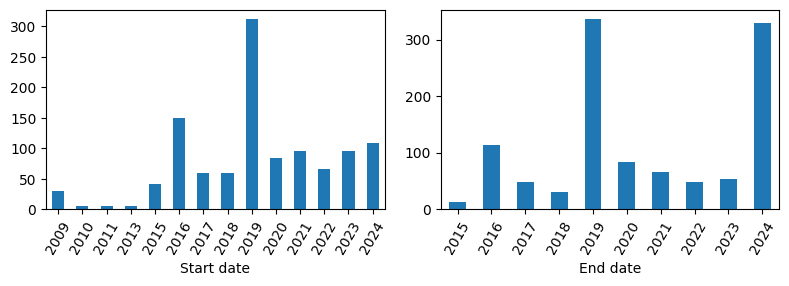

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

df["Start date"].dt.year.value_counts().sort_index().plot(kind='bar', ax=axes[0])
df["End date"].dt.year.value_counts().sort_index().plot(kind='bar', ax=axes[1])

for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

plt.tight_layout()

Contudo, a base do VDem só possui dados para até 2023. Os dados de 2024 serão publicados em março de 2025, muito provavelmente. Então, o estudo somente considerará anos até 2023, mesmo que hajam banimentos em 2024.

### Rede Social

As redes sociais da base do Surfshark são: **Facebook**, **X (antigo Twitter)**, **YouTube**, **Instagram**, **Telegram** e **Whatsapp**.

Além dessas, a base da iniciativa #KeepItOn (uma das fontes para a base do Surfshark) considera outras redes sociais. Como os casos positivos de banimento serão muito poucos nessa tabela combinatória, é importante adicionar o máximo de casos possível.

As redes adicionais são: **TikTok**, as redes na colunas "outros" com maior variedade de países banidores.
> Decidi não incluir Grindr pois os dados para essa rede são muito poucos

### Tabela Combinatória

In [25]:
países = np.array(df_inalterado["Country"].dropna().unique())
países = np.delete(países, np.where(np.isin(países, países_retirados))) # Retirar "Jammu and Kashmir"

anos = np.array([range(2009, 2023+1)]) # +1 pois se o valor final foi 2024, as combinações só consideram até 2023
redes = np.array(["Facebook", # 'Grindr', # Não incluí
                  "Instagram", "Telegram", "TikTok", "Whatsapp", "X (formerly Twitter)", "Youtube"])

países_grid, anos_grid, redes_grid = np.meshgrid(países, anos, redes, indexing='ij')

combinações = pd.DataFrame({
    "Country": países_grid.ravel(),
    "Year": anos_grid.ravel(),
    "Soc_media": redes_grid.ravel()
})

# Adicionar coluna Banned (= 0)
combinações["Banned"] = [0] * combinações.shape[0] # No final, esse passo acaba sendo inútil, pois é repetido depois, de outra forma

combinações

,Country,Year,Soc_media,Banned
0,Algeria,2009,Facebook,0
1,Algeria,2009,Instagram,0
2,Algeria,2009,Telegram,0
3,Algeria,2009,TikTok,0
4,Algeria,2009,Whatsapp,0
...,...,...,...,...
18055,Vanuatu,2023,Telegram,0
18056,Vanuatu,2023,TikTok,0
18057,Vanuatu,2023,Whatsapp,0
18058,Vanuatu,2023,X (formerly Twitter),0


In [26]:
# Adicionar coluna ISO-alpha2 Code
ISOs = df_inalterado[['Country', 'ISO-alpha2 Code']].value_counts().reset_index().sort_values(by="Country").drop(columns=['count'])
ISOs

,Country,ISO-alpha2 Code
0,Afghanistan,AF
1,Albania,AL
2,Algeria,DZ
3,Andorra,AD
4,Angola,AO
...,...,...
191,Venezuela,VE
192,Vietnam,VN
193,Yemen,YE
194,Zambia,ZM


In [27]:
combinações = combinações.merge(ISOs, how='left', on='Country').reindex(columns=["Country", "ISO-alpha2 Code", "Soc_media",
                                                                                 "Year", "Banned"])
combinações

,Country,ISO-alpha2 Code,Soc_media,Year,Banned
0,Algeria,DZ,Facebook,2009,0
1,Algeria,DZ,Instagram,2009,0
2,Algeria,DZ,Telegram,2009,0
3,Algeria,DZ,TikTok,2009,0
4,Algeria,DZ,Whatsapp,2009,0
...,...,...,...,...,...
18055,Vanuatu,VU,Telegram,2023,0
18056,Vanuatu,VU,TikTok,2023,0
18057,Vanuatu,VU,Whatsapp,2023,0
18058,Vanuatu,VU,X (formerly Twitter),2023,0


#### Adicionando Casos de Banimento

Para adicionar os casos de banimento da base df à tabela combinatória, é preciso, primeiramente, transformar as datas de df em anos, para encaixar com a tabela.

**Regras:**
1. Para banimentos com duração de menos de 1 ano, ele será tratado como 1 ano, mesmo que tenha ocorrido por poucas horas
2. Para banimentos com duração de mais de 1 ano, ele será transformado em múltiplas entradas (uma para cada ano dentro do intervalo)
3. Para banimentos de uma mesma rede em um mesmo ano pelo mesmo país mais de uma vez, essa informação será retirada quando eventualmente for feita a retirada de linhas duplicadas

In [28]:
# Transformando data em somente ano
df['Start date'] = [df['Start date'][data].year for data in range(0, df.shape[0])]
df['End date'] = [df['End date'][data].year for data in range(0, df.shape[0])]
df["Year"] = [0] * df.shape[0] # Variável vazia

#### Incluir dados do TikTok

Antes de criar a variável única de ano (sem start nem end date)

In [29]:
tiktok = [
    ["Armenia",     "AM", "TikTok", 2020, 2020, 1, 0],
    ["Armenia",     "AM", "TikTok", 2022, 2023, 1, 0],
    ["Afghanistan", "AF", "TikTok", 2022, 2024, 1, 0],
    ["Azerbaijan",  "AZ", "TikTok", 2020, 2023, 1, 0], # Um de 20 a 22 e outro de 23 a 23
    ["Bangladesh",  "BA", "TikTok", 2024, 2024, 1, 0],
    ["Bangladesh",  "BA", "TikTok", 2018, 2020, 1, 0],
    ["China",       "CN", "TikTok", 2017, 2024, 1, 0], # TikTok surgiu em 2017 (imediatamente banido)
    ["Ethiopia",    "ET", "TikTok", 2023, 2024, 1, 0],
    # ["France",      "FR", "TikTok", 2024, 2024, 1, 0] # TikTok ban in New Caledonia
    ["India",       "IN", "TikTok", 2019, 2024, 1, 0], # Um só em 2019 e outro desde 2020
    ["Indonesia",   "ID", "TikTok", 2018, 2018, 1, 0],
    ["Iran",        "IR", "TikTok", 2017, 2024, 1, 0], # TikTok surgiu em 2017 (imediatamente banido)
    ["Jordan",      "JO", "TikTok", 2022, 2024, 1, 0],
    ["Kyrgyzstan",  "KG", "TikTok", 2023, 2024, 1, 0],
    ["Nepal",       "NP", "TikTok", 2023, 2023, 1, 0],
    ["North Korea", 'KP', "TikTok", 2017, 2023, 1, 0], # TikTok surgiu em 2017 (imediatamente banido)
    ["Pakistan",    "PK", "TikTok", 2020, 2021, 1, 0],
    ["Senegal",     "SN", "TikTok", 2023, 2024, 1, 0],
    ["Somalia",     "SO", "TikTok", 2023, 2024, 1, 0],
    ["Turkey",      "TR", "TikTok", 2024, 2024, 1, 0],
    ["Uzbekistan",  "UZ", "TikTok", 2021, 2024, 1, 0],
]

tiktok_df = pd.DataFrame(tiktok, columns=["Country", "ISO-alpha2 Code", "Soc_media", "Start date", "End date", "Banned", "Year"])

df = pd.concat([df, tiktok_df]).sort_values(by="Country", ascending=True).reset_index(drop=True)

In [30]:
df[df["Country"] == "North Korea"]

,Country,ISO-alpha2 Code,Start date,End date,Soc_media,Banned,Year
470,North Korea,KP,2015,2024,Facebook,0.0,0
471,North Korea,KP,2016,2024,Facebook,1.0,0
472,North Korea,KP,2017,2024,Facebook,0.0,0
473,North Korea,KP,2015,2024,Whatsapp,0.0,0
474,North Korea,KP,2016,2024,Instagram,0.0,0
475,North Korea,KP,2017,2024,Instagram,0.0,0
476,North Korea,KP,2015,2024,Instagram,1.0,0
477,North Korea,KP,2015,2024,X (formerly Twitter),0.0,0
478,North Korea,KP,2016,2024,Whatsapp,0.0,0
479,North Korea,KP,2017,2023,TikTok,1.0,0


In [31]:
base[(base["Country"] == "Senegal") & (base["Soc_media"] == "TikTok")]

NameError: name 'base' is not defined

#### Variável ano

In [ ]:
# Se start date for igual a end date: não fazer nada. Essa observação constinua sendo uma só
# Se start date for menor que end date: criar uma nova observação igual para cada ano de start date até end date

# As colunas start date e end date vão sumir para virar uma única coluna de ano ("Year")

# Quando eu adiciono Start Date[i], eu efetivamente duplico a linha do primeiro ano, então preciso apagar as linhas que ficaram com Year = 0

for i in range(0, df.shape[0]):
    if df['Start date'][i] != df['End date'][i]:
        for ano in range(int(df['Start date'][i]), int(df['End date'][i])+1): # +1 é necessário para que o último ano seja adicionado
            linha = df.loc[i].copy()
            linha["Year"] = ano
            df.loc[-1] = linha.copy()
            df.reset_index(drop=True, inplace=True)
    else:
        df.loc[i, "Year"] = df.loc[i, "Start date"]

df

In [ ]:
# Retirar colunas start e end date
df.drop(columns=["Start date", "End date"], inplace=True)

# Retirar observações em que Year é 0
df = df[df["Year"] != 0]

df = df.reindex(columns=["Country", "ISO-alpha2 Code", "Soc_media", "Year", "Banned"])
df

In [ ]:
print("Banned (1's)", df["Banned"].sum())
print("Unique Countries", df["Country"].nunique())

#### Combinando Dados

In [ ]:
# Casos positivos de df

df_pos = df[df['Banned'] == 1]

# E não duplicados
df_pos.drop_duplicates(inplace=True)

# E até 2023
print('df.shape:', df_pos[df_pos['Year'] < 2024].shape)

### Juntando as Bases

Incluir os dados de banimento na tabela combinatória

In [ ]:
merge = combinações.merge(df_pos.drop(columns='ISO-alpha2 Code'),
                          on=["Country", "Soc_media", "Year"],
                          how="left",
                          suffixes=('(combinações)', # tabela original (X = combinações)
                                    '(df)')) # tabela a ser fundida (Y = df)

# Atualizar o valor de "Banned" no DataFrame combinações
merge["Banned"] = merge["Banned(df)"].fillna(0) # Banned_df tem 1's e NAs

merge.drop(columns=['Banned(combinações)', 'Banned(df)'], inplace=True)

merge

In [ ]:
print("Banned (1's):", merge["Banned"].sum())
print("Unique Countries:", merge["Country"].nunique())

#### Corrigindo Dados Impossíveis

O Sudão do Sul declarou independência em 2011, então só passou a existir como entidade internacional a partir de então, e, por essa razão, não deveria possuir dados para antes desse ano. Portanto, irei retirar os dados do Sudão do Sul para antes de 2011.

In [ ]:
merge.drop(merge[(merge['Country'] == 'South Sudan') & (merge['Year'] < 2011)].index, inplace=True)

O Instagram foi criado em 2010 e, pela mesma lógica, não deveria possuir observações para antes dessa data.

O Telegram foi criado em 2013 e o TikTok em 2017 (lançamento internacional) e também não deveriam possuir dados anteriores.

In [ ]:
merge.drop(merge[(merge['Soc_media'] == 'Instagram') & (merge['Year'] < 2010)].index, inplace=True)
merge.drop(merge[(merge['Soc_media'] == 'Telegram') &  (merge['Year'] < 2013)].index, inplace=True)
merge.drop(merge[(merge['Soc_media'] == 'TikTok') &    (merge['Year'] < 2017)].index, inplace=True)

In [ ]:
merge.Year.value_counts()

### Análise simples dos dados até o momento

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

merge.groupby('Soc_media')['Banned'].sum().sort_values().plot(kind='barh', ax=axes[0], 
                                                              xlabel='Bans (Country x Year)')

merge.groupby('Year')['Banned'].sum().plot(kind='line', ax=axes[1], 
                                           ylabel='Banimentos')

In [ ]:
merge.groupby(['Soc_media', 'Year'])['Banned'].sum().unstack().T.plot(kind='line', stacked=False,
                                                                      ylabel='Bans', figsize=(7,5))
# merge.groupby('Year')['Banned'].sum().plot(kind='line', ylabel='Banimentos')

In [ ]:
merge.groupby(['Soc_media', 'Year'])['Banned'].sum().unstack().T

### Tabela Auxiliar: ISO Codes

Criar uma tabela auxiliar de identificadores dos países: nome, códigos ISO (alpha 2 e 3) e numérico, para usar como chave comum de conversão entre tabelas (para conseguir juntar as informações de duas tabelas).

Fonte: IBAN https://www.iban.com/country-codes

In [ ]:
códigos = [
    ["Afghanistan", "AF", "AFG", 4],
    ["Albania", "AL", "ALB", 8],
    ["Algeria", "DZ", "DZA", 12],
    ["American Samoa", "AS", "ASM", 16],
    ["Andorra", "AD", "AND", 20],
    ["Angola", "AO", "AGO", 24],
    ["Anguilla", "AI", "AIA", 660],
    ["Antarctica", "AQ", "ATA", 10],
    ["Antigua and Barbuda", "AG", "ATG", 28],
    ["Argentina", "AR", "ARG", 32],
    ["Armenia", "AM", "ARM", 51],
    ["Aruba", "AW", "ABW", 533],
    ["Australia", "AU", "AUS", 36],
    ["Austria", "AT", "AUT", 40],
    ["Azerbaijan", "AZ", "AZE", 31],
    ["Bahamas (the)", "BS", "BHS", 44],
    ["Bahrain", "BH", "BHR", 48],
    ["Bangladesh", "BD", "BGD", 50],
    ["Barbados", "BB", "BRB", 52],
    ["Belarus", "BY", "BLR", 112],
    ["Belgium", "BE", "BEL", 56],
    ["Belize", "BZ", "BLZ", 84],
    ["Benin", "BJ", "BEN", 204],
    ["Bermuda", "BM", "BMU", 60],
    ["Bhutan", "BT", "BTN", 64],
    ["Bolivia (Plurinational State of)", "BO", "BOL", 68],
    ["Bonaire, Sint Eustatius and Saba", "BQ", "BES", 535],
    ["Bosnia and Herzegovina", "BA", "BIH", 70],
    ["Botswana", "BW", "BWA", 72],
    ["Bouvet Island", "BV", "BVT", 74],
    ["Brazil", "BR", "BRA", 76],
    ["British Indian Ocean Territory (the)", "IO", "IOT", 86],
    ["Brunei Darussalam", "BN", "BRN", 96],
    ["Bulgaria", "BG", "BGR", 100],
    ["Burkina Faso", "BF", "BFA", 854],
    ["Burundi", "BI", "BDI", 108],
    ["Cabo Verde", "CV", "CPV", 132],
    ["Cambodia", "KH", "KHM", 116],
    ["Cameroon", "CM", "CMR", 120],
    ["Canada", "CA", "CAN", 124],
    ["Cayman Islands (the)", "KY", "CYM", 136],
    ["Central African Republic (the)", "CF", "CAF", 140],
    ["Chad", "TD", "TCD", 148],
    ["Chile", "CL", "CHL", 152],
    ["China", "CN", "CHN", 156],
    ["Christmas Island", "CX", "CXR", 162],
    ["Cocos (Keeling) Islands (the)", "CC", "CCK", 166],
    ["Colombia", "CO", "COL", 170],
    ["Comoros (the)", "KM", "COM", 174],
    ["Congo (the Democratic Republic of the)", "CD", "COD", 180],
    ["Congo (the)", "CG", "COG", 178],
    ["Cook Islands (the)", "CK", "COK", 184],
    ["Costa Rica", "CR", "CRI", 188],
    ["Croatia", "HR", "HRV", 191],
    ["Cuba", "CU", "CUB", 192],
    ["Curaçao", "CW", "CUW", 531],
    ["Cyprus", "CY", "CYP", 196],
    ["Czechia", "CZ", "CZE", 203],
    ["Côte d'Ivoire", "CI", "CIV", 384],
    ["Denmark", "DK", "DNK", 208],
    ["Djibouti", "DJ", "DJI", 262],
    ["Dominica", "DM", "DMA", 212],
    ["Dominican Republic (the)", "DO", "DOM", 214],
    ["Ecuador", "EC", "ECU", 218],
    ["Egypt", "EG", "EGY", 818],
    ["El Salvador", "SV", "SLV", 222],
    ["Equatorial Guinea", "GQ", "GNQ", 226],
    ["Eritrea", "ER", "ERI", 232],
    ["Estonia", "EE", "EST", 233],
    ["Eswatini", "SZ", "SWZ", 748],
    ["Ethiopia", "ET", "ETH", 231],
    ["Falkland Islands (the) [Malvinas]", "FK", "FLK", 238],
    ["Faroe Islands (the)", "FO", "FRO", 234],
    ["Fiji", "FJ", "FJI", 242],
    ["Finland", "FI", "FIN", 246],
    ["France", "FR", "FRA", 250],
    ["French Guiana", "GF", "GUF", 254],
    ["French Polynesia", "PF", "PYF", 258],
    ["French Southern Territories (the)", "TF", "ATF", 260],
    ["Gabon", "GA", "GAB", 266],
    ["Gambia (the)", "GM", "GMB", 270],
    ["Georgia", "GE", "GEO", 268],
    ["Germany", "DE", "DEU", 276],
    ["Ghana", "GH", "GHA", 288],
    ["Gibraltar", "GI", "GIB", 292],
    ["Greece", "GR", "GRC", 300],
    ["Greenland", "GL", "GRL", 304],
    ["Grenada", "GD", "GRD", 308],
    ["Guadeloupe", "GP", "GLP", 312],
    ["Guam", "GU", "GUM", 316],
    ["Guatemala", "GT", "GTM", 320],
    ["Guernsey", "GG", "GGY", 831],
    ["Guinea", "GN", "GIN", 324],
    ["Guinea-Bissau", "GW", "GNB", 624],
    ["Guyana", "GY", "GUY", 328],
    ["Haiti", "HT", "HTI", 332],
    ["Heard Island and McDonald Islands", "HM", "HMD", 334],
    ["Holy See (the)", "VA", "VAT", 336],
    ["Honduras", "HN", "HND", 340],
    ["Hong Kong", "HK", "HKG", 344],
    ["Hungary", "HU", "HUN", 348],
    ["Iceland", "IS", "ISL", 352],
    ["India", "IN", "IND", 356],
    ["Indonesia", "ID", "IDN", 360],
    ["Iran (Islamic Republic of)", "IR", "IRN", 364],
    ["Iraq", "IQ", "IRQ", 368],
    ["Ireland", "IE", "IRL", 372],
    ["Isle of Man", "IM", "IMN", 833],
    ["Israel", "IL", "ISR", 376],
    ["Italy", "IT", "ITA", 380],
    ["Jamaica", "JM", "JAM", 388],
    ["Japan", "JP", "JPN", 392],
    ["Jersey", "JE", "JEY", 832],
    ["Jordan", "JO", "JOR", 400],
    ["Kazakhstan", "KZ", "KAZ", 398],
    ["Kenya", "KE", "KEN", 404],
    ["Kiribati", "KI", "KIR", 296],
    ["Korea (the Democratic People's Republic of)", "KP", "PRK", 408],
    ["Korea (the Republic of)", "KR", "KOR", 410],
    ["Kuwait", "KW", "KWT", 414],
    ["Kyrgyzstan", "KG", "KGZ", 417],
    ["Lao People's Democratic Republic (the)", "LA", "LAO", 418],
    ["Latvia", "LV", "LVA", 428],
    ["Lebanon", "LB", "LBN", 422],
    ["Lesotho", "LS", "LSO", 426],
    ["Liberia", "LR", "LBR", 430],
    ["Libya", "LY", "LBY", 434],
    ["Liechtenstein", "LI", "LIE", 438],
    ["Lithuania", "LT", "LTU", 440],
    ["Luxembourg", "LU", "LUX", 442],
    ["Macao", "MO", "MAC", 446],
    ["Madagascar", "MG", "MDG", 450],
    ["Malawi", "MW", "MWI", 454],
    ["Malaysia", "MY", "MYS", 458],
    ["Maldives", "MV", "MDV", 462],
    ["Mali", "ML", "MLI", 466],
    ["Malta", "MT", "MLT", 470],
    ["Marshall Islands (the)", "MH", "MHL", 584],
    ["Martinique", "MQ", "MTQ", 474],
    ["Mauritania", "MR", "MRT", 478],
    ["Mauritius", "MU", "MUS", 480],
    ["Mayotte", "YT", "MYT", 175],
    ["Mexico", "MX", "MEX", 484],
    ["Micronesia (Federated States of)", "FM", "FSM", 583],
    ["Moldova (the Republic of)", "MD", "MDA", 498],
    ["Monaco", "MC", "MCO", 492],
    ["Mongolia", "MN", "MNG", 496],
    ["Montenegro", "ME", "MNE", 499],
    ["Montserrat", "MS", "MSR", 500],
    ["Morocco", "MA", "MAR", 504],
    ["Mozambique", "MZ", "MOZ", 508],
    ["Myanmar", "MM", "MMR", 104],
    ["Namibia", "NA", "NAM", 516],
    ["Nauru", "NR", "NRU", 520],
    ["Nepal", "NP", "NPL", 524],
    ["Netherlands (the)", "NL", "NLD", 528],
    ["New Caledonia", "NC", "NCL", 540],
    ["New Zealand", "NZ", "NZL", 554],
    ["Nicaragua", "NI", "NIC", 558],
    ["Niger (the)", "NE", "NER", 562],
    ["Nigeria", "NG", "NGA", 566],
    ["Niue", "NU", "NIU", 570],
    ["Norfolk Island", "NF", "NFK", 574],
    ["Northern Mariana Islands (the)", "MP", "MNP", 580],
    ["Norway", "NO", "NOR", 578],
    ["Oman", "OM", "OMN", 512],
    ["Pakistan", "PK", "PAK", 586],
    ["Palau", "PW", "PLW", 585],
    ["Palestine, State of", "PS", "PSE", 275],
    ["Panama", "PA", "PAN", 591],
    ["Papua New Guinea", "PG", "PNG", 598],
    ["Paraguay", "PY", "PRY", 600],
    ["Peru", "PE", "PER", 604],
    ["Philippines (the)", "PH", "PHL", 608],
    ["Pitcairn", "PN", "PCN", 612],
    ["Poland", "PL", "POL", 616],
    ["Portugal", "PT", "PRT", 620],
    ["Puerto Rico", "PR", "PRI", 630],
    ["Qatar", "QA", "QAT", 634],
    ["Republic of North Macedonia", "MK", "MKD", 807],
    ["Romania", "RO", "ROU", 642],
    ["Russian Federation (the)", "RU", "RUS", 643],
    ["Rwanda", "RW", "RWA", 646],
    ["Réunion", "RE", "REU", 638],
    ["Saint Barthélemy", "BL", "BLM", 652],
    ["Saint Helena, Ascension and Tristan da Cunha", "SH", "SHN", 654],
    ["Saint Kitts and Nevis", "KN", "KNA", 659],
    ["Saint Lucia", "LC", "LCA", 662],
    ["Saint Martin (French part)", "MF", "MAF", 663],
    ["Saint Pierre and Miquelon", "PM", "SPM", 666],
    ["Saint Vincent and the Grenadines", "VC", "VCT", 670],
    ["Samoa", "WS", "WSM", 882],
    ["San Marino", "SM", "SMR", 674],
    ["Sao Tome and Principe", "ST", "STP", 678],
    ["Saudi Arabia", "SA", "SAU", 682],
    ["Senegal", "SN", "SEN", 686],
    ["Serbia", "RS", "SRB", 688],
    ["Seychelles", "SC", "SYC", 690],
    ["Sierra Leone", "SL", "SLE", 694],
    ["Singapore", "SG", "SGP", 702],
    ["Sint Maarten (Dutch part)", "SX", "SXM", 534],
    ["Slovakia", "SK", "SVK", 703],
    ["Slovenia", "SI", "SVN", 705],
    ["Solomon Islands", "SB", "SLB", 90],
    ["Somalia", "SO", "SOM", 706],
    ["South Africa", "ZA", "ZAF", 710],
    ["South Georgia and the South Sandwich Islands", "GS", "SGS", 239],
    ["South Sudan", "SS", "SSD", 728],
    ["Spain", "ES", "ESP", 724],
    ["Sri Lanka", "LK", "LKA", 144],
    ["Sudan (the)", "SD", "SDN", 729],
    ["Suriname", "SR", "SUR", 740],
    ["Svalbard and Jan Mayen", "SJ", "SJM", 744],
    ["Sweden", "SE", "SWE", 752],
    ["Switzerland", "CH", "CHE", 756],
    ["Syrian Arab Republic", "SY", "SYR", 760],
    ["Taiwan (Province of China)", "TW", "TWN", 158],
    ["Tajikistan", "TJ", "TJK", 762],
    ["Tanzania, United Republic of", "TZ", "TZA", 834],
    ["Thailand", "TH", "THA", 764],
    ["Timor-Leste", "TL", "TLS", 626],
    ["Togo", "TG", "TGO", 768],
    ["Tokelau", "TK", "TKL", 772],
    ["Tonga", "TO", "TON", 776],
    ["Trinidad and Tobago", "TT", "TTO", 780],
    ["Tunisia", "TN", "TUN", 788],
    ["Turkey", "TR", "TUR", 792],
    ["Turkmenistan", "TM", "TKM", 795],
    ["Turks and Caicos Islands (the)", "TC", "TCA", 796],
    ["Tuvalu", "TV", "TUV", 798],
    ["Uganda", "UG", "UGA", 800],
    ["Ukraine", "UA", "UKR", 804],
    ["United Arab Emirates (the)", "AE", "ARE", 784],
    ["United Kingdom of Great Britain and Northern Ireland (the)", "GB", "GBR", 826],
    ["United States Minor Outlying Islands (the)", "UM", "UMI", 581],
    ["United States of America (the)", "US", "USA", 840],
    ["Uruguay", "UY", "URY", 858],
    ["Uzbekistan", "UZ", "UZB", 860],
    ["Vanuatu", "VU", "VUT", 548],
    ["Venezuela (Bolivarian Republic of)", "VE", "VEN", 862],
    ["Viet Nam", "VN", "VNM", 704],
    ["Virgin Islands (British)", "VG", "VGB", 92],
    ["Virgin Islands (U.S.)", "VI", "VIR", 850],
    ["Wallis and Futuna", "WF", "WLF", 876],
    ["Western Sahara", "EH", "ESH", 732],
    ["Yemen", "YE", "YEM", 887],
    ["Zambia", "ZM", "ZMB", 894],
    ["Zimbabwe", "ZW", "ZWE", 716],
    ["Åland Islands", "AX", "ALA", 248]
]

códigos_df = pd.DataFrame(códigos, columns=["Country name", "ISO-alpha2 Code", "ISO-alpha3 Code", "ISO-numeric"])

códigos_df


In [ ]:
merge_ISO = pd.merge(merge, códigos_df[["ISO-alpha2 Code", "ISO-alpha3 Code"]],
                               on = "ISO-alpha2 Code",
                               how = 'left')

merge_ISO = merge_ISO.reindex(columns=["Country", "ISO-alpha2 Code", "ISO-alpha3 Code", "Soc_media", "Year", "Banned"])
merge_ISO

## V-Dem


### Adicionando variáveis

Nesta etapa, agregaremos dados do V-Dem à base. Eles serão:

* Índice de democracia
  * Intervalo – v2x_polyarchy
  * Categoria – v2x_regime
* Índice de liberdade de religião – v2clrelig_osp
* Capacidade de censurar a internet – v2smgovfilcap_osp
* Capacidade de derrubar a internet – v2smgovshutcap_osp
* Capacidade de vigiar a internet – v2smgovsmmon_osp
* Capacidade de regular a internet – v2smregcap_osp
* Grau de ideologia no governo – v2exl_legitideol
  * Tipos:
    * Grau de nacionalismo – v2exl_legitideolcr_0
    * Grau de socialismo/comunismo – v2exl_legitideolcr_1
    * Grau de restauradorismo/conservadorismo – v2exl_legitideolcr_2
    * Grau de separatismo/autonomismo – v2exl_legitideolcr_3
    * Grau de religiosidade – v2exl_legitideolcr_4
* Frequência e intensidade de mobilizações populares – v2cagenmob_osp
  * Mobilizações pró-democracia – v2cademmob_osp
  * Mobilizações pró-autocracia – v2caautmob_osp
* Grau de interferência de governos externos por meio de redes sociais – v2smfordom_osp
* Uso de redes sociais para organizar ação política offline
  * Cidadão médio – v2smorgavgact_osp
  * Elites – v2smorgelitact_osp
  * Tipos:
    * Petition signing – v2smorgtypes_0
    * Voter turnout – v2smorgtypes_1
    * Street Protests – v2smorgtypes_2
    * Strikes/labour actions – v2smorgtypes_3
    * Riots – v2smorgtypes_4
    * Organized rebellion – v2smorgtypes_5
    * Vigilante justice – v2smorgtypes_6
    * Terrorism – v2smorgtypes_7
    * Ethnic cleansing/genocide – v2smorgtypes_8
* Grau de polarização – v2smpolsoc_osp
* Divisão político-geográfica – e_regionpol
* PIB
  * PIB – e_gdp
  * PIB per capita – e_gdppc
* População – e_wb_pop

In [ ]:
vdem = pd.read_csv("C:/Users/leost/Downloads/R/TCC/V-Dem vars selecionadas (_ord).csv")
vdem

In [ ]:
vdem.rename(columns = {'country_name': 'Country', 
                       'country_text_id': 'ISO-alpha3 Code', 
                       'year': 'Year'}, 
            inplace = True)
vdem.columns

### Unindo as tabelas

In [ ]:
merge2 = merge_ISO.merge(vdem,
                         on=['ISO-alpha3 Code', "Year"],
                         how="left",
                         suffixes=('(merge)', # tabela original (X = merge_ISO)
                                   '(vdem)')) # tabela a ser fundida (Y = vdem)
merge2

In [ ]:
# # Se eu quiser adicionar os dados para o Sudão do Sul pré-2011 com os valores do Sudão:
# sudan_pre_2011 = merge2[(merge2['Country(merge)'] == 'Sudan') & (merge2['Year']<2011)].iloc[:, 3:]
# merge2.loc[(merge2['Country(merge)'] == 'South Sudan') & (merge2['Year'] < 2011), merge2.columns[3:]] = sudan_pre_2011.values

In [ ]:
merge2.rename(columns = {'Country(merge)': 'Country'}, inplace=True)
merge2.drop(columns='Country(vdem)', inplace=True)
merge2.columns

### Variação Democrática
Adicionando a variável de diferença entre o índice de democracia do país originário (de onde a rede social vem) e do país banidor (de onde a rede social foi banida)

In [ ]:
soc_media_countries = pd.DataFrame({'Soc_media': ['Facebook',
                                                  'Grindr', # *
                                                  'Instagram',
                                                  'Telegram', # **
                                                  'TikTok',
                                                  'Whatsapp',
                                                  'X (formerly Twitter)',
                                                  'Youtube'
                                                 ], 
                                    'ISO_soc_media': ['USA',
                                                      'USA', # * Com um período de China no meio, preciso incluir essa mudança depois (caso fosse usar o Grindr)
                                                      'USA',
                                                      'RUS', # ** Depois UAE, preciso incluir essa mudança depois
                                                      'CHN',
                                                      'USA',
                                                      'USA',
                                                      'USA'
                                                     ]
                                   })
soc_media_countries

In [ ]:
# # Forma mais demorada, mas é um one-liner
# merge2['dem_var'] = [float(merge2['v2x_polyarchy'][i] - vdem.loc[(vdem['ISO-alpha3 Code'] == soc_media_countries.loc[soc_media_countries['Soc_media'] == merge2['Soc_media'][i], 'ISO'][i % 8]) & (vdem['Year'] == merge2['Year'][i]), 'v2x_polyarchy'].values[0]) for i in range(0, merge2.shape[0])]

In [ ]:
merge2 = merge2.merge(soc_media_countries,
                      on=['Soc_media'],
                      how="left",
                      suffixes=('(merge2)',
                                '(Tabela)')
                     ).merge(vdem.rename(columns={'ISO-alpha3 Code': 'ISO_soc_media',
                                                  'v2x_polyarchy': 'poly_soc_media'})[['ISO_soc_media', 'Year', 'poly_soc_media']],
                             on=['Year', 'ISO_soc_media'],
                             how="left",
                             suffixes=('(merge2_soc_media)', 
                                       '(vdem_soc_media)'))

merge2['dem_var'] = merge2['v2x_polyarchy'] - merge2['poly_soc_media']

merge2.drop(columns=['ISO_soc_media', 'poly_soc_media'], inplace=True)

cols = list(merge2.columns)
cols.insert(cols.index("v2x_polyarchy") + 1, cols.pop(cols.index("dem_var")))
merge2 = merge2.reindex(columns=cols)

merge2

In [ ]:
base[base["Country"].isin(["China", "The U.S."])]

## Adicionando Dados: População e PIB per capita

In [ ]:
# População
wb_pop = pd.read_excel('Dados_pop_World_Bank.xlsx', 
                       sheet_name='Data',
                      skiprows=3)

wb_pop.drop(wb_pop.columns[2:53], axis=1, inplace=True)
wb_pop = pd.melt(wb_pop,
                 id_vars = wb_pop.columns[:2],
                 value_vars = wb_pop.columns[2:],
                 var_name = "Year",
                 value_name = "pop")
wb_pop['Year'] = wb_pop['Year'].astype(int)
wb_pop = wb_pop.drop(columns='Country Name').rename(columns={'Country Code': 'ISO-alpha3 Code'})

In [ ]:
# PIB per capita World Bank
wb_pib_pc = pd.read_excel('GDP per capita (current US$) - World Bank.xlsx', 
                          sheet_name='Data',
                          skiprows=3)

wb_pib_pc.drop(wb_pib_pc.columns[2:53], axis=1, inplace=True)
wb_pib_pc = pd.melt(wb_pib_pc,
                    id_vars = wb_pib_pc.columns[:2],
                    value_vars = wb_pib_pc.columns[2:],
                    var_name = "Year",
                    value_name = "PIB per capita")
wb_pib_pc['Year'] = wb_pib_pc['Year'].astype(int)

wb_pib_pc = wb_pib_pc.drop(columns='Country Name').rename(columns={'Country Code': 'ISO-alpha3 Code'})

In [ ]:
# PIB per capita IMF
imf_pib_pc = pd.read_excel('GDP per capita - IMF.xlsx')

imf_pib_pc = pd.melt(imf_pib_pc,
                 id_vars = imf_pib_pc.columns[:3],
                 value_vars = imf_pib_pc.columns[3:],
                 var_name = "Year",
                 value_name = "PIB per capita")
imf_pib_pc['Year'] = imf_pib_pc['Year'].astype(int)

imf_pib_pc = imf_pib_pc.rename(columns={'GDP per capita, current prices\n (U.S. dollars per capita)': 'Country'}).drop(columns=['Country', 'ISO-alpha2 Code'])
imf_pib_pc['ISO-alpha3 Code'] = imf_pib_pc['ISO-alpha3 Code'].str.strip()

In [ ]:
merge3 = merge2.drop(columns=['e_wb_pop', 'e_gdp', 'e_gdppc']
                    ).merge(wb_pop,
                            on=['ISO-alpha3 Code', "Year"],
                            how="left").merge(wb_pib_pc,
                                              on=['ISO-alpha3 Code', "Year"],
                                              how="left").merge(imf_pib_pc,
                                                                on=['ISO-alpha3 Code', "Year"],
                                                                how="left",
                                                                suffixes=('(WB)', 
                                                                          '(IMF)'))

merge3['PIB per capita'] = merge3['PIB per capita(WB)'].fillna(merge3['PIB per capita(IMF)'])
merge3.drop(columns=['PIB per capita(WB)', 'PIB per capita(IMF)'], inplace = True)
merge3

In [ ]:
# PIB per capita Coreia do Norte
# Fonte: UN Data - United Nations Statistics Division

pib_dprk = [
    ["Democratic People's Republic of Korea", 'PRK', 2022, 590],
    ["Democratic People's Republic of Korea", 'PRK', 2021, 654],
    ["Democratic People's Republic of Korea", 'PRK', 2020, 621],
    ["Democratic People's Republic of Korea", 'PRK', 2019, 643],
    ["Democratic People's Republic of Korea", 'PRK', 2018, 692],
    ["Democratic People's Republic of Korea", 'PRK', 2017, 690],
    ["Democratic People's Republic of Korea", 'PRK', 2016, 671],
    ["Democratic People's Republic of Korea", 'PRK', 2015, 654],
    ["Democratic People's Republic of Korea", 'PRK', 2014, 702],
    ["Democratic People's Republic of Korea", 'PRK', 2013, 672],
    ["Democratic People's Republic of Korea", 'PRK', 2012, 648],
    ["Democratic People's Republic of Korea", 'PRK', 2011, 642],
    ["Democratic People's Republic of Korea", 'PRK', 2010, 573],
    ["Democratic People's Republic of Korea", 'PRK', 2009, 497]
]

pib_dprk_df = pd.DataFrame(pib_dprk, columns=["Country", "ISO-alpha3 Code", 'Year', 'PIB per capita'])

In [ ]:
merge4 = merge3.merge(pib_dprk_df.drop(columns=['Country']),
             on=['ISO-alpha3 Code', 'Year'],
             how='left',
             suffixes=('', '_dprk'))
merge4['PIB per capita'] = merge4['PIB per capita'].fillna(merge4['PIB per capita_dprk'])
merge4.drop(columns=['PIB per capita_dprk'], inplace=True)

#### Conferindo valores vazios e duplicados

In [ ]:
merge4.isnull().sum()

In [ ]:
merge4.groupby(['Country', 
                'Year'])[['PIB per capita']].apply(lambda x: x.isnull().sum()
                                                  ).query('`PIB per capita` > 0').head(60)

In [ ]:
merge4[merge4.duplicated()]

# Não há linhas duplicadas

In [ ]:
base.head(20).iloc[:, :15]

#### Banimentos

In [ ]:
print(f'Porcentagem de observações positivas: {(merge4.Banned.sum() / merge4.shape[0]) * 100 :.3f}%')

# Análise dos dados

In [ ]:
# Mudar o nome da base, para praticidade
base = merge4.copy()

In [ ]:
base.info()

In [ ]:
base.describe(include = "all")

In [ ]:
base.shape

In [ ]:
print('5 primeiros e 5 últimos valores:\n')
for col in base.columns:
    nmr  = base[col].nunique()
    counts = base[col].value_counts()
    print(f'{col}\nValores: {nmr}\n\n[Head]\n{counts.head().to_string(header=False)}\n',
          f'\n[Tail]\n{counts.tail().to_string(header=False) if nmr >= 10 else counts.tail(nmr-5).to_string(header=False) if nmr >5 else ''}\n' if nmr > 5 else '',
         "\n-------------------------\n")

In [ ]:
# base[base['pop'] == 10525347.0] # Portugal (2023) e Czechia (2014) possuem o mesmo número de habitantes
# base[base['PIB per capita'] == 654] # Coreia do Norte possui o mesmo PIB_pc em 2015 e 2021
# # A quantidade é ímpar, pois o TikTok não existia em anos anteriores a 2017

In [ ]:
print(f'{base[base["v2x_regime"].isin([0,1])]["v2x_regime"].value_counts()}\n')
print(f'{base[base["v2x_regime"].isin([2,3])]["v2x_regime"].value_counts()}')

### Correlações

In [ ]:
!pip install seaborn

In [ ]:
import seaborn as sns

In [ ]:
graf = plt.figure(figsize=(25, 15))

sns.heatmap((base.drop(columns=['Country', 'Soc_media', 'ISO-alpha2 Code', 'ISO-alpha3 Code']).corr()),
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm')

In [ ]:
def corr_limite(df, limite):
    
    corr = df.corr().where(lambda x: (x > limite) | (x < -limite)) # Filtrar df
    np.fill_diagonal(corr.values, np.nan)                          # Limpar diagonal só com 1s (corr da variável com ela própria)
    corr = corr.dropna(how='all').dropna(axis=1, how='all')        # Apagar linhas e colunas vazias
    np.fill_diagonal(corr.values, 1)                               # Recolocar diagonal só com 1s (nas linhas remanescentes)
    
    return corr

In [ ]:
plt.figure(figsize=(10, 5))

limite = 0.5
sns.heatmap(corr_limite(base.drop(columns=['Country', 'Soc_media', 'ISO-alpha2 Code', 'ISO-alpha3 Code']), limite),
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title(f"Heatmap of Correlations (> {limite} or < -{limite})\n", fontsize=13)

### Distribuições (violinplot + boxplot)

In [ ]:
base_filt = base.drop(columns = ['Country', 'Year', 'Soc_media', 'dem_var', #'ISO-alpha2 Code', 'ISO-alpha3 Code', 
                                 'e_regionpol', 'pop', 'PIB per capita', 'random_u', 'random_n'])

base_filt_1 = base_filt[["Banned", 'v2x_polyarchy', 'v2exl_legitideolcr_0', 'v2exl_legitideolcr_1', 'v2exl_legitideolcr_2', 'v2exl_legitideolcr_3',
                         'v2exl_legitideolcr_4', 'v2smorgtypes_0', 'v2smorgtypes_1', 'v2smorgtypes_2','v2smorgtypes_3', 'v2smorgtypes_4', 
                         'v2smorgtypes_5', 'v2smorgtypes_6', 'v2smorgtypes_7', 'v2smorgtypes_8']]

base_filt_4 = base_filt.drop(columns = base_filt_1.columns)

for c, plot in enumerate([base_filt_1, base_filt_4]):
    plt.figure(figsize=(8, 15))
    sns.violinplot(plot, 
                   orient='h',
                   inner='quart',
                   cut=0,
                   bw_adjust=.3)
    sns.boxplot(plot, 
                orient='h', 
                width=.15)
    
    plt.yticks(ticks=range(len(plot.columns)), 
               labels=plot.columns)
    plt.title(f"Plots in range 0:{1 if c < 1 else 4}", fontsize=13)
    plt.show()   

In [ ]:
columns = ['Year', 'dem_var', 'e_regionpol', 'pop', 'PIB per capita', 'random_u', 'random_n']

fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(8, len(columns)*2), sharex=False)

for i, col in enumerate(columns):
    sns.violinplot(base[col], 
                   orient='h',
                   inner='quart',
                   cut=0,
                   bw_adjust=.3,
                   ax=axes[i])
    
    sns.boxplot(base[col], 
                orient='h', 
                width=.15,
                color='steelblue', 
                ax=axes[i])

    axes[i].set_ylabel(col, 
                       fontsize=12, 
                       rotation=0, 
                       labelpad=0, 
                       ha='right', 
                       va='center') # 'top', 'bottom', 'center', 'baseline', 'center_baseline'
    axes[i].set_xlabel('')
    
plt.suptitle("Plots of Non-Ordinal Variables", fontsize=13)
plt.tight_layout()
plt.show()

In [ ]:
base.groupby(["Soc_media", 'v2x_regime'])["Banned"].sum()

In [ ]:
base.groupby(["Soc_media", 'v2x_regime'])["Banned"].sum().unstack().plot(kind='barh', stacked=True,
                                                                         xlabel='Bans')

In [ ]:
base.groupby(['Year', 'v2x_regime'])['Banned'].sum().unstack().plot(kind='line', stacked=False,
                                                                      ylabel='Bans')

In [ ]:
# Único caso de banimento em uma democracia liberal
base[(base['v2x_regime'] == 3) & (base['Banned'] == 1)]

In [ ]:
anos_dems = base[base["Soc_media"] == "Facebook"].groupby('Year')['v2x_regime'].value_counts().unstack()

anos_dems.plot(kind='line', figsize=(7, 5))

for column in anos_dems.columns:
    for x, y in zip(anos_dems.index, anos_dems[column]):
        if y > 0:  # Only add labels for non-zero values
            plt.text(x, y, str(int(y)), ha='center', va='bottom', fontsize=8)

plt.title('Trends in Regime Types')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.legend(title='Regime types', 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
base[(base["Soc_media"] == "Facebook") & (base["Year"] == 2023)].sort_values(by="v2x_polyarchy", ascending=True).iloc[90:150]

In [ ]:
base[(base["Country"] == "Armenia") & (base["Soc_media"] == "Facebook")]

# Data Prep

#### Passos comuns:
1. **Soc_media:** One-Hot encoding
2. Reescalar PIB e pop? Não deveria ser necessário para modelos de árvore, mas vamos ver se muda

#### O que cada modelo requer na preparação dos dados?
* Regressão logística
    * Reescalar variáveis
        * Avaliar outliers e, caso existam, utilizar robust scaling
    * Preencher NAs
        * Em PIB per capita: método forward (ou backward) fill, pois o PIB do ano t será mais próximo do PIB no ano t-1 que de qualquer outro ano
    * **Country:** Binary encoding
* Árvore de Decisão
    * É um modelo que analisa cada variável individualmente, então não preciso reescalar os dados
* Random Forest
    * Mesmo que Árvore de Decisão
    * **Country:** Label encoder (testar One-Hot e ver se algum país é relevante)


In [ ]:
base.head()

As colunas de códigos ISO não são mais necessárias, pois contém a mesma informação que a coluna com o nome do país. Portanto, posso retirá-las.

In [ ]:
base.drop(columns=['ISO-alpha2 Code', 'ISO-alpha3 Code'], inplace=True)

#### Preencher NAs: método forward/backward fill

In [ ]:
base.isnull().sum()

In [ ]:
base = base.ffill().bfill()
# base[['Country', 'Year', 'PIB per capita']][(base['Year'] >= 2018) & (base['Country'].isin(['Cuba', 'Eritrea', 'North Korea', 'Syria']))].drop_duplicates()

#### Adicionar variáveis aleatórias

Servem como duplo thershold para avaliar a importância das features

In [ ]:
np.random.seed(1234)

base["random_u"] = np.random.uniform(0, 1, base.shape[0])
base["random_n"] = np.random.normal(0, 1, base.shape[0])

## Divisão Democrático X Autocrático

A minha classificação de democracias será: democracias liberais + democracias eleitorais

In [473]:
base_dem = base[base['v2x_regime'].isin([2, 3])]
base_aut = base[base['v2x_regime'].isin([0, 1])]

dem_banimentos = base.groupby(by='v2x_regime')['Banned'].sum()

print("Democracias:", base_dem.shape[0], f'({(base_dem.shape[0]/base.shape[0])*100 :.2f}%)', 
      f'\n{base_dem['v2x_regime'].value_counts().to_string(header=False)}')
print("Banimentos:",  f'{dem_banimentos[2] + dem_banimentos[3] :.0f}',
      f'({((dem_banimentos[2] + dem_banimentos[3])/base_dem.shape[0])*100 :.2f}%)',
      f'[{((dem_banimentos[2] + dem_banimentos[3])/base.shape[0])*100 :.2f}% do total]\n')

print("Autocracias:", base_aut.shape[0], f'({(base_aut.shape[0]/base.shape[0])*100 :.2f}%)', 
      f'\n{base_aut['v2x_regime'].value_counts().to_string(header=False)}')
print("Banimentos:",  f'{dem_banimentos[0] + dem_banimentos[1] :.0f}',
      f'({((dem_banimentos[0] + dem_banimentos[1])/base_aut.shape[0])*100 :.2f}%)',
      f'[{((dem_banimentos[0] + dem_banimentos[1])/base.shape[0])*100 :.2f}% do total]\n')

Democracias: 8367 (52.91%) 
2    4931
3    3436
Banimentos: 47 (0.56%) [0.30% do total]

Autocracias: 7448 (47.09%) 
1    5279
0    2169
Banimentos: 620 (8.32%) [3.92% do total]



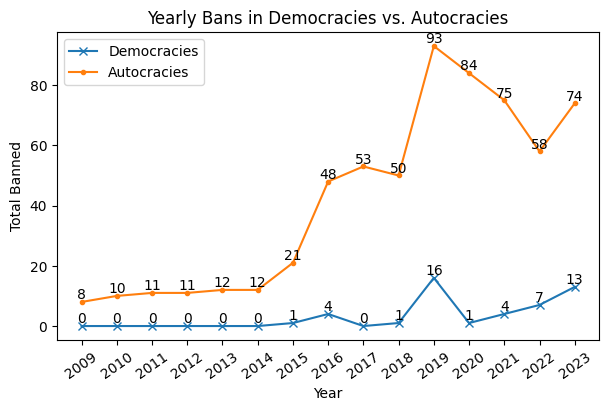

In [474]:
dem_ano_ban = base_dem.groupby('Year')['Banned'].sum()
aut_ano_ban = base_aut.groupby('Year')['Banned'].sum()

# print('Ano', ' Dem', '    Aut', '\n----------------')
# for i, ano in enumerate(dem_ano_ban.index):
#     print(ano, dem_ano_ban.values[i], '---', aut_ano_ban.values[i])

# Plot the data
plt.figure(figsize=(7, 4))
plt.plot(dem_ano_ban.index, dem_ano_ban.values, label='Democracies', marker='x')
plt.plot(aut_ano_ban.index, aut_ano_ban.values, label='Autocracies', marker='.')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Banned')
plt.title('Yearly Bans in Democracies vs. Autocracies')
plt.legend()

# Annotate each point with its value
for x, y in zip(dem_ano_ban.index, dem_ano_ban.values):
    plt.text(x, y, str(int(y)), ha='center', va='bottom')

for x, y in zip(aut_ano_ban.index, aut_ano_ban.values):
    plt.text(x, y, str(int(y)), ha='center', va='bottom')

plt.xticks(dem_ano_ban.index,
           rotation=35
          )

plt.show()

In [475]:
dem_ban = base_dem[(base_dem['Banned'] == 1)].sort_values(by=['Year', 'Country'], ascending=True)

print("Países autocráticos que baniram:", base_aut[(base_aut['Banned'] == 1)]['Country'].nunique(), "\n",
      "Casos:", base_aut[(base_aut['Banned'] == 1)].shape[0], '\n')
print("Países democráticos que baniram:", dem_ban['Country'].nunique(), "\n", 
      "Casos:", base_dem[(base_dem['Banned'] == 1)].shape[0], "\n",
      "-->", ", ".join(np.sort(dem_ban["Country"].unique())))

# Há somente 45 banimentos em democracias e estes são eles:
dem_ban 

Países autocráticos que baniram: 53 
 Casos: 620 

Países democráticos que baniram: 11 
 Casos: 47 
 --> Armenia, Brazil, Ecuador, Georgia, Indonesia, Liberia, Mali, Nepal, Senegal, Sri Lanka, Suriname


,Country,Soc_media,Year,Banned,v2x_polyarchy,dem_var,v2x_regime,v2clrelig_ord,v2smgovfilcap_ord,v2smgovshutcap_ord,...,v2smorgtypes_5,v2smorgtypes_6,v2smorgtypes_7,v2smorgtypes_8,v2smpolsoc_ord,e_regionpol,pop,PIB per capita,random_u,random_n
14377,Brazil,Whatsapp,2015,1.0,0.868,-0.037,2,4,1,1,...,0.182,0.182,0.000,0.091,0,2,205188205.0,8783.215424,0.581447,0.518796
14383,Brazil,Whatsapp,2016,1.0,0.778,-0.113,2,4,1,1,...,0.182,0.182,0.000,0.091,0,2,206859578.0,8680.736469,0.005971,1.825901
5829,Georgia,Youtube,2016,1.0,0.693,-0.198,2,3,2,2,...,0.000,0.000,0.000,0.000,2,1,3727505.0,4143.401257,0.530873,-0.560730
2889,Mali,Facebook,2016,1.0,0.544,-0.347,2,3,2,4,...,0.000,0.000,0.143,0.000,0,4,18700106.0,750.051809,0.406487,0.894449
2893,Mali,X (formerly Twitter),2016,1.0,0.544,-0.347,2,3,2,4,...,0.000,0.000,0.143,0.000,0,4,18700106.0,750.051809,0.200728,0.883802
6024,Indonesia,TikTok,2018,1.0,0.603,0.526,2,3,3,2,...,0.091,0.182,0.091,0.000,1,7,267066843.0,3902.661676,0.946386,0.681928
14676,Ecuador,Facebook,2019,1.0,0.622,-0.190,2,4,1,1,...,0.500,0.250,0.125,0.000,0,2,17343740.0,6203.727051,0.815001,1.480544
14677,Ecuador,Instagram,2019,1.0,0.622,-0.190,2,4,1,1,...,0.500,0.250,0.125,0.000,0,2,17343740.0,6203.727051,0.421693,0.789668
14680,Ecuador,Whatsapp,2019,1.0,0.622,-0.190,2,4,1,1,...,0.500,0.250,0.125,0.000,0,2,17343740.0,6203.727051,0.740788,0.073120
6028,Indonesia,Facebook,2019,1.0,0.601,-0.211,2,3,3,2,...,0.000,0.250,0.000,0.000,1,7,269582878.0,4151.227554,0.891162,-0.983019


In [476]:
dem_ban.sort_values(by="Soc_media")

,Country,Soc_media,Year,Banned,v2x_polyarchy,dem_var,v2x_regime,v2clrelig_ord,v2smgovfilcap_ord,v2smgovshutcap_ord,...,v2smorgtypes_5,v2smorgtypes_6,v2smorgtypes_7,v2smorgtypes_8,v2smpolsoc_ord,e_regionpol,pop,PIB per capita,random_u,random_n
3926,Senegal,Facebook,2021,1.0,0.726,-0.099,2,4,3,4,...,0.000,0.000,0.000,0.000,2,4,16876720.0,1630.695072,0.593574,-0.815559
8073,Sri Lanka,Facebook,2022,1.0,0.604,-0.230,2,3,3,4,...,0.333,0.167,0.000,0.000,1,8,22181000.0,3342.720125,0.032186,-0.564569
8052,Sri Lanka,Facebook,2019,1.0,0.565,-0.247,2,3,3,4,...,0.000,0.167,0.167,0.000,1,8,21803000.0,4082.694049,0.939873,0.223115
3940,Senegal,Facebook,2023,1.0,0.617,-0.231,2,4,3,4,...,0.000,0.200,0.000,0.000,1,4,17763163.0,1745.972068,0.591437,-1.537022
6028,Indonesia,Facebook,2019,1.0,0.601,-0.211,2,3,3,2,...,0.000,0.250,0.000,0.000,1,7,269582878.0,4151.227554,0.891162,-0.983019
14676,Ecuador,Facebook,2019,1.0,0.622,-0.190,2,4,1,1,...,0.500,0.250,0.125,0.000,0,2,17343740.0,6203.727051,0.815001,1.480544
2541,Liberia,Facebook,2019,1.0,0.623,-0.189,2,4,1,4,...,0.200,0.200,0.000,0.000,1,4,4985289.0,665.878448,0.339857,-0.281271
15072,Suriname,Facebook,2023,1.0,0.753,-0.095,3,4,1,2,...,0.250,0.000,0.000,0.000,1,10,623236.0,6069.028901,0.995317,-0.318603
2889,Mali,Facebook,2016,1.0,0.544,-0.347,2,3,2,4,...,0.000,0.000,0.143,0.000,0,4,18700106.0,750.051809,0.406487,0.894449
14677,Ecuador,Instagram,2019,1.0,0.622,-0.190,2,4,1,1,...,0.500,0.250,0.125,0.000,0,2,17343740.0,6203.727051,0.421693,0.789668


In [477]:
print("Banimentos por tipo de regime:", 
      f'\n\n{base[['v2x_regime', 'Banned']].value_counts().reset_index().to_string(index=False)}')
base.groupby(by='v2x_regime')[['v2x_regime', 'Banned']].value_counts()

Banimentos por tipo de regime: 

 v2x_regime  Banned  count
          1     0.0   4998
          2     0.0   4887
          3     0.0   3433
          0     0.0   1830
          0     1.0    339
          1     1.0    281
          2     1.0     44
          3     1.0      3


v2x_regime  Banned
0           0.0       1830
            1.0        339
1           0.0       4998
            1.0        281
2           0.0       4887
            1.0         44
3           0.0       3433
            1.0          3
Name: count, dtype: int64

É necessário retirar a variável v2x_regime das bases já divididas, pois ela é altamente correlacionada com v2x_polyarchy, visto que ambas medem a mesma característica, sendo uma ordinal e a outra contínua, e são, portanto, redundantes.

In [478]:
base_dem.drop(columns=['v2x_regime'], inplace=True)
base_aut.drop(columns=['v2x_regime'], inplace=True)

C:\Users\leost\AppData\Local\Temp\ipykernel_10120\1177835927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_dem.drop(columns=['v2x_regime'], inplace=True)
C:\Users\leost\AppData\Local\Temp\ipykernel_10120\1177835927.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_aut.drop(columns=['v2x_regime'], inplace=True)


## Divisão Treino X Teste

**Serão criadas 3 variações por modelo:**
1. Uma que é treinada e testada com os dados de países **democráticos**
    * E também testada nos dados de países autocráticos
2. Uma que é treinada e testada com os dados de países **autocráticos**
    * E também testada nos dados de países democráticos
3. Uma que é treinada e testada com **todos** os dados da base (união dos dados democráticos e autocráticos)
    * E também testada separadamente para os dados democráticos e os autocráticos

In [479]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [480]:
from sklearn.model_selection import train_test_split

In [481]:
dem_xtrain, dem_xtest, dem_ytrain, dem_ytest = train_test_split(base_dem.drop(columns = ['Banned']), 
                                                                base_dem['Banned'], 
                                                                test_size = 0.3, 
                                                                random_state = 1234)

aut_xtrain, aut_xtest, aut_ytrain, aut_ytest = train_test_split(base_aut.drop(columns = ['Banned']), 
                                                                base_aut['Banned'], 
                                                                test_size = 0.3, 
                                                                random_state = 1234)

# Vou repetir esse passo depois de passar a pipeline pelas bases dem e aut
pre_pipe_geral_xtrain = pd.concat([dem_xtrain, aut_xtrain])
pre_pipe_geral_xtest  = pd.concat([dem_xtest,  aut_xtest])
geral_ytrain =          pd.concat([dem_ytrain, aut_ytrain])
geral_ytest  =          pd.concat([dem_ytest,  aut_ytest])

print('    Variável', '   Shape', '   Países únicos', ' Bans')
for x_contador, x in enumerate([dem_xtrain, dem_xtest, dem_ytrain, dem_ytest, 
                                aut_xtrain, aut_xtest, aut_ytrain, aut_ytest, 
                                pre_pipe_geral_xtrain, pre_pipe_geral_xtest, geral_ytrain, geral_ytest
                               ]):
    print(f'{'  dem_' if x_contador < 4 else '  aut_' if x_contador < 8 else 'geral_'}{'x' if x_contador % 4 < 2 else 'y'}{'train:' if x_contador % 2 == 0 else 'test: '} {x.shape} {'--- ' + str(x['Country'].nunique()) if x_contador % 4 < 2 else '   -------------- ' + str(x.sum())}')

    Variável    Shape    Países únicos  Bans
  dem_xtrain: (5856, 37) --- 109
  dem_xtest:  (2511, 37) --- 108
  dem_ytrain: (5856,)    -------------- 31.0
  dem_ytest:  (2511,)    -------------- 16.0
  aut_xtrain: (5213, 37) --- 100
  aut_xtest:  (2235, 37) --- 99
  aut_ytrain: (5213,)    -------------- 426.0
  aut_ytest:  (2235,)    -------------- 194.0
geral_xtrain: (11069, 37) --- 172
geral_xtest:  (4746, 37) --- 172
geral_ytrain: (11069,)    -------------- 457.0
geral_ytest:  (4746,)    -------------- 210.0


### Pipeline

In [482]:
!pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable


In [529]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler

import category_encoders as ce

# Vou criar uma única pipeline que sirva para ambos os modelos. Quando precisar de um passo específico para um dos modelos, crio uma nova pipeline, que 
# será a pipeline antiga + os novos passos

# Então fica da seguinte forma:
## pipe_base = {passos em comum}
## pipe_reg  = {pipe_base + passos para regressão}
## pipe_tree = {pipe_base + passos para árvore (se existirem)}

# Se eu precisar realizar algum passo na pipeline que dependa da variável resposta, eu preciso adicionar ela novamente na base. No momento, x e y estão separados 
# Mas é importante manter não reindexar e perder a conexão de cada observação com sua var respota

# Quando aplicar a pipeline em aut_xtrain, após haver treinado em dem_xtrain, tenho que rodar o .fit() e .transform() de novo, pois os dados de dem e de aut são diferentes.

# Re-concatenar as bases de dem e aut para formar as bases "geral", após haver passado o pipeline

In [533]:
num_cols = pre_pipe_geral_xtrain.select_dtypes('number').columns

In [541]:
pipe_reg = Pipeline(steps=[
    ('One-hot Encoding', ce.OneHotEncoder(cols=['Soc_media'])),
    ('Ordinal Encoding', ce.OrdinalEncoder(cols=['Country'])),
    ('Scaling', ColumnTransformer(transformers=[
        ('Outlier Scaling', RobustScaler(), num_cols) 
    ], remainder='passthrough', verbose_feature_names_out=False).set_output(transform='pandas')
    ),
])

In [485]:
pipe_tree = Pipeline(steps=[
    ('One-hot Encoding', ce.OneHotEncoder(cols=['Soc_media'])),
    ('Ordinal Encoding', ce.OrdinalEncoder(cols=['Country']))
])

In [486]:
# Eu preciso fazer one-hot e binary pra regressão ou ordinalEncoder é suficiente?
# Será que é melhor manter "soc_media" como one-hot?

In [542]:
# Pre-processing para regressão 
dem_xtrain_reg = pipe_reg.fit_transform(dem_xtrain)
dem_xtest_reg  = pipe_reg.transform(dem_xtest)
aut_xtrain_reg = pipe_reg.fit_transform(aut_xtrain)
aut_xtest_reg  = pipe_reg.transform(aut_xtest)
geral_xtrain_reg = pd.concat([dem_xtrain_reg, aut_xtrain_reg])
geral_xtest_reg  = pd.concat([dem_xtest_reg,  aut_xtest_reg])

In [488]:
# Pre-processing para árvores 
dem_xtrain_tree = pipe_tree.fit_transform(dem_xtrain)
dem_xtest_tree  = pipe_tree.transform(dem_xtest)
aut_xtrain_tree = pipe_tree.fit_transform(aut_xtrain)
aut_xtest_tree  = pipe_tree.transform(aut_xtest)
geral_xtrain_tree = pd.concat([dem_xtrain_tree, aut_xtrain_tree])
geral_xtest_tree  = pd.concat([dem_xtest_tree,  aut_xtest_tree])

# Modelagem

In [489]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.model_selection import GridSearchCV

In [490]:
def scores(y, pred):
    scores = {
        'Accuracy': accuracy_score(y, pred),
        
        'Precision': float(precision_score(y, pred, 
                                           pos_label=1,
                                           zero_division=0)),
        'Recall': float(recall_score(y, pred, 
                                     pos_label=1,
                                     zero_division=0)),
        'F1 Score': float(f1_score(y, pred, 
                                   pos_label=1,
                                   zero_division=0))
    }
    return scores

## Regressão Logística

In [90]:
from sklearn.linear_model import LogisticRegression

In [594]:
hiperparams_reg = {
    'random_state': 1234,
    'solver': 'saga', # Esse solver aceita None, 'l1', 'l2' e 'elasticnet' como penalidades
    'max_iter': 1000
}

hiperparams_reg_dem = { # Best Cross-Validation Score: 0.01059
    'random_state': 1234,
    'solver': 'saga',
    'max_iter': 1000,
    'penalty': None,
    'tol': 1e-6,
    'C': 0.01,
    'class_weight': 'balanced',
    'l1_ratio': 0.1
}

hiperparams_reg_aut = { # Best Cross-Validation Score: 0.15109
    'random_state': 1234,
    'solver': 'saga',
    'max_iter': 1000,
    'penalty': None,
    'tol': 1e-6,
    'C': 0.01,
    'class_weight': 'balanced',
    'l1_ratio': 0.1
}

hiperparams_reg_geral = { # Best Cross-Validation Score: 0.08026
    'random_state': 1234,
    'solver': 'saga',
    'max_iter': 1000,
    'penalty': None,
    'tol': 1e-6,
    'C': 0.01,
    'class_weight': 'balanced',
    'l1_ratio': 0.1
}

In [ ]:
param_grid_reg = {
    'penalty': [None, 'l1', 'l2', 'elasticnet'],
    'tol': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2],
    'C': [0.01, 0.1, 1, 10, 100],
    'class_weight': [None, 'balanced'],
    'l1_ratio': [0.1, 0.5, 0.9]
}



### Democracias

#### Treino

In [595]:
# Sem GridSearchCV
dem_reg = LogisticRegression(**hiperparams_reg_dem).fit(dem_xtrain_reg, dem_ytrain)

C:\Users\leost\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
C:\Users\leost\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\leost\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# grid_search_dem_reg = GridSearchCV(
#     estimator = LogisticRegression(**hiperparams_reg),
#     param_grid = param_grid_reg,
#     scoring = 'f1',
#     cv = 5,
#     # verbose = 4,
#     n_jobs = -1,
#     error_score="raise"
# ).fit(dem_xtrain_reg, dem_ytrain)

In [ ]:
# print("Best Parameters:", grid_search_dem_reg.best_params_)
# print(f"Best Cross-Validation Score: {grid_search_dem_reg.best_score_ :.5f}")

# dem_reg = grid_search_dem_reg.best_estimator_

In [596]:
print(f'Quantos banimentos há para acertar: {dem_ytrain.sum()}')

Quantos banimentos há para acertar: 31.0


{'Accuracy': 0.7165300546448088,
 'Precision': 0.018332347723240685,
 'Recall': 1.0,
 'F1 Score': 0.036004645760743324}

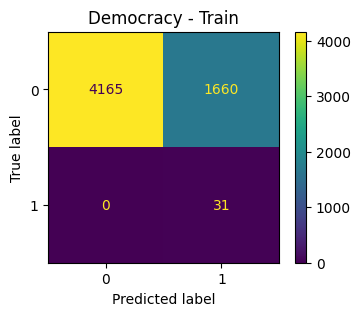

In [599]:
pred_train_dem_reg = dem_reg.predict(dem_xtrain_reg)

fig, ax = plt.subplots(figsize=(4, 3))
ConfusionMatrixDisplay(confusion_matrix(dem_ytrain, pred_train_dem_reg)).plot(ax=ax)
plt.title('Democracy - Train')

scores(dem_ytrain, pred_train_dem_reg)

In [600]:
pd.DataFrame({
    'Variável': dem_xtrain_reg.columns,
    'Coeficiente': dem_reg.coef_[0]
})

,Variável,Coeficiente
0,Year,14.202933
1,v2x_polyarchy,5.104392
2,dem_var,-1.874000
3,v2clrelig_ord,-1.610780
4,v2smgovfilcap_ord,0.976456
5,v2smgovshutcap_ord,5.683935
6,v2smgovsmmon_ord,-8.557389
7,v2smregcap_ord,-4.557455
8,v2exl_legitideol_ord,-8.763871
9,v2exl_legitideolcr_0,5.237464


#### Teste

In [601]:
print(f'Quantos banimentos há para acertar: {dem_ytest.sum()}')

Quantos banimentos há para acertar: 16.0


{'Accuracy': 0.71047391477499,
 'Precision': 0.020242914979757085,
 'Recall': 0.9375,
 'F1 Score': 0.03963011889035667}

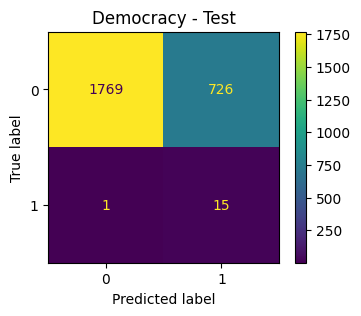

In [602]:
pred_test_dem_reg = dem_reg.predict(dem_xtest_reg)

fig, ax = plt.subplots(figsize=(4, 3))
ConfusionMatrixDisplay(confusion_matrix(dem_ytest, pred_test_dem_reg)).plot(ax=ax)
plt.title('Democracy - Test')

scores(dem_ytest, pred_test_dem_reg)

### Autocracias

#### Treino

In [604]:
# Sem GridSearchCV
aut_reg = LogisticRegression(**hiperparams_reg_aut).fit(aut_xtrain_reg, aut_ytrain)

C:\Users\leost\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
C:\Users\leost\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\leost\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# grid_search_aut_reg = GridSearchCV(
#     estimator = LogisticRegression(**hiperparams_reg),
#     param_grid = param_grid_reg,
#     scoring = 'f1',
#     cv = 5,
#     # verbose = 4,
#     n_jobs = -1,
#     error_score="raise"
# ).fit(aut_xtrain_reg, aut_ytrain)

In [ ]:
# print("Best Parameters:", grid_search_aut_reg.best_params_)
# print(f"Best Cross-Validation Score: {grid_search_aut_reg.best_score_ :.5f}")

# aut_reg = grid_search_aut_reg.best_estimator_

In [605]:
print(f'Quantos banimentos há para acertar: {aut_ytrain.sum()}')

Quantos banimentos há para acertar: 426.0


{'Accuracy': 0.7863034720890083,
 'Precision': 0.25842696629213485,
 'Recall': 0.863849765258216,
 'F1 Score': 0.3978378378378378}

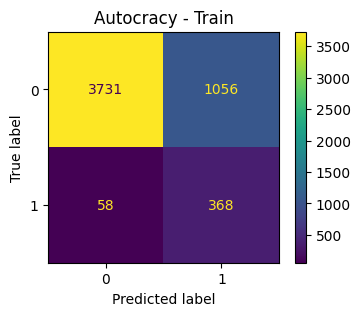

In [607]:
pred_train_aut_reg = aut_reg.predict(aut_xtrain_reg)

fig, ax = plt.subplots(figsize=(4, 3))
ConfusionMatrixDisplay(confusion_matrix(aut_ytrain, pred_train_aut_reg)).plot(ax=ax)
plt.title('Autocracy - Train')

scores(aut_ytrain, pred_train_aut_reg)

In [608]:
pd.DataFrame({
    'Variável': aut_xtrain_reg.columns,
    'Coeficiente': aut_reg.coef_[0]
})

,Variável,Coeficiente
0,Year,1.770513
1,v2x_polyarchy,-1.715425
2,dem_var,0.102461
3,v2clrelig_ord,-0.011675
4,v2smgovfilcap_ord,-0.304650
5,v2smgovshutcap_ord,0.721493
6,v2smgovsmmon_ord,-0.575283
7,v2smregcap_ord,1.064152
8,v2exl_legitideol_ord,-0.013076
9,v2exl_legitideolcr_0,-0.493165


#### Teste

In [609]:
print(f'Quantos banimentos há para acertar: {aut_ytest.sum()}')

Quantos banimentos há para acertar: 194.0


{'Accuracy': 0.7897091722595079,
 'Precision': 0.2707641196013289,
 'Recall': 0.8402061855670103,
 'F1 Score': 0.40954773869346733}

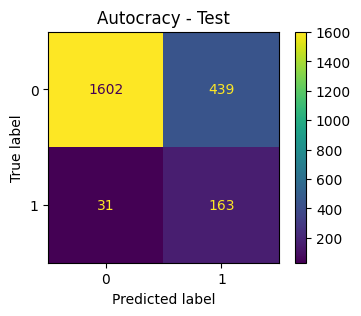

In [610]:
pred_test_aut_reg = aut_reg.predict(aut_xtest_reg)

fig, ax = plt.subplots(figsize=(4, 3))
ConfusionMatrixDisplay(confusion_matrix(aut_ytest, pred_test_aut_reg)).plot(ax=ax)
plt.title('Autocracy - Test')

scores(aut_ytest, pred_test_aut_reg)

### Geral

#### Treino

In [611]:
# Sem GridSearchCV
geral_reg = LogisticRegression(**hiperparams_reg_geral).fit(geral_xtrain_reg, geral_ytrain)

C:\Users\leost\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
C:\Users\leost\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\leost\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# grid_search_geral_reg = GridSearchCV(
#     estimator = LogisticRegression(**hiperparams_reg),
#     param_grid = param_grid_reg,
#     scoring = 'f1',
#     cv = 5,
#     # verbose = 4,
#     n_jobs = -1,
#     error_score="raise"
# ).fit(geral_xtrain_reg, geral_ytrain)

In [ ]:
# print("Best Parameters:", grid_search_geral_reg.best_params_)
# print(f"Best Cross-Validation Score: {grid_search_geral_reg.best_score_ :.5f}")

# geral_reg = grid_search_geral_reg.best_estimator_

In [612]:
print(f'Quantos banimentos há para acertar: {geral_ytrain.sum()}')

Quantos banimentos há para acertar: 457.0


{'Accuracy': 0.8094678832776222,
 'Precision': 0.15867768595041323,
 'Recall': 0.8402625820568927,
 'F1 Score': 0.2669447340980188}

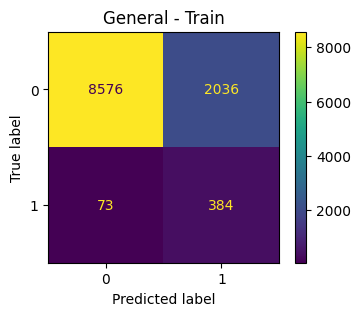

In [617]:
pred_train_geral_reg = geral_reg.predict(geral_xtrain_reg)

fig, ax = plt.subplots(figsize=(4, 3))
ConfusionMatrixDisplay(confusion_matrix(geral_ytrain, pred_train_geral_reg)).plot(ax=ax)
plt.title('General - Train')

scores(geral_ytrain, pred_train_geral_reg)

In [614]:
pd.DataFrame({
    'Variável': geral_xtrain_reg.columns,
    'Coeficiente': geral_reg.coef_[0]
})

,Variável,Coeficiente
0,Year,1.562504
1,v2x_polyarchy,-0.596411
2,dem_var,-0.214806
3,v2clrelig_ord,-0.293844
4,v2smgovfilcap_ord,-0.367556
5,v2smgovshutcap_ord,0.290860
6,v2smgovsmmon_ord,-1.255907
7,v2smregcap_ord,1.650559
8,v2exl_legitideol_ord,-0.966551
9,v2exl_legitideolcr_0,-0.093474


#### Teste

In [615]:
print(f'Quantos banimentos há para acertar: {geral_ytest.sum()}')

Quantos banimentos há para acertar: 210.0


{'Accuracy': 0.8198482932996207,
 'Precision': 0.17522658610271905,
 'Recall': 0.8285714285714286,
 'F1 Score': 0.2892768079800499}

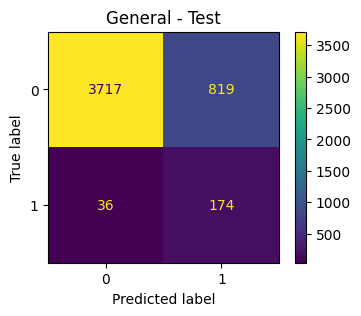

In [618]:
pred_test_geral_reg = geral_reg.predict(geral_xtest_reg)

fig, ax = plt.subplots(figsize=(4, 3))
ConfusionMatrixDisplay(confusion_matrix(geral_ytest, pred_test_geral_reg)).plot(ax=ax)
plt.title('General - Test')

scores(geral_ytest, pred_test_geral_reg)

### Cross-Comparison

#### Modelo Democrático

Quantos banimentos há para acertar: 194.0


{'Accuracy': 0.6407158836689038,
 'Precision': 0.1111111111111111,
 'Recall': 0.4484536082474227,
 'F1 Score': 0.1780962128966223}

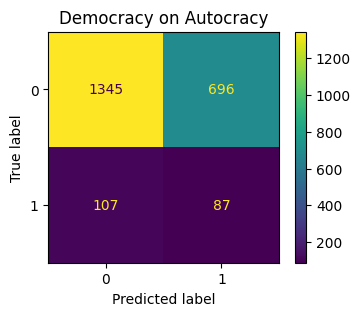

In [619]:
# modelo democrático nos dados autocráticos
print(f'Quantos banimentos há para acertar: {aut_ytest.sum()}')
pred_test_demXaut_reg = dem_reg.predict(aut_xtest_reg)

fig, ax = plt.subplots(figsize=(4, 3))
ConfusionMatrixDisplay(confusion_matrix(aut_ytest, pred_test_demXaut_reg)).plot(ax=ax)
plt.title('Democracy on Autocracy')


scores(aut_ytest, pred_test_demXaut_reg)

#### Modelo Autocrático

Quantos banimentos há para acertar: 16.0


{'Accuracy': 0.6264436479490243,
 'Precision': 0.013713080168776372,
 'Recall': 0.8125,
 'F1 Score': 0.026970954356846474}

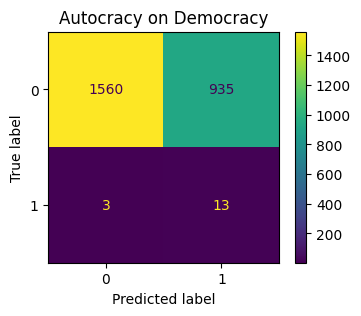

In [620]:
# modelo autocrático nos dados democráticos
print(f'Quantos banimentos há para acertar: {dem_ytest.sum()}')
pred_test_autXdem_reg = aut_reg.predict(dem_xtest_reg)

fig, ax = plt.subplots(figsize=(4, 3))
ConfusionMatrixDisplay(confusion_matrix(dem_ytest, pred_test_autXdem_reg)).plot(ax=ax)
plt.title('Autocracy on Democracy')

scores(dem_ytest, pred_test_autXdem_reg)

#### Modelo Geral

Quantos banimentos há para acertar: 16.0


{'Accuracy': 0.9115890083632019,
 'Precision': 0.04017857142857143,
 'Recall': 0.5625,
 'F1 Score': 0.075}

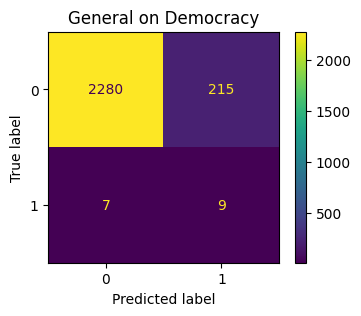

In [621]:
# modelo geral nos dados democráticos
print(f'Quantos banimentos há para acertar: {dem_ytest.sum()}')
pred_test_geralXdem_reg = geral_reg.predict(dem_xtest_reg)

fig, ax = plt.subplots(figsize=(4, 3))
ConfusionMatrixDisplay(confusion_matrix(dem_ytest, pred_test_geralXdem_reg)).plot(ax=ax)
plt.title('General on Democracy')

scores(dem_ytest, pred_test_geralXdem_reg)

Quantos banimentos há para acertar: 194.0


{'Accuracy': 0.7167785234899329,
 'Precision': 0.21456436931079323,
 'Recall': 0.8505154639175257,
 'F1 Score': 0.3426791277258567}

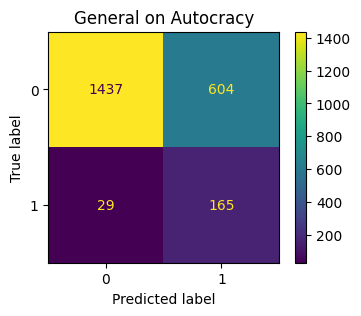

In [622]:
# modelo geral nos dados autocráticos
print(f'Quantos banimentos há para acertar: {aut_ytest.sum()}')
pred_test_geralXaut_reg = geral_reg.predict(aut_xtest_reg)

fig, ax = plt.subplots(figsize=(4, 3))
ConfusionMatrixDisplay(confusion_matrix(aut_ytest, pred_test_geralXaut_reg)).plot(ax=ax)
plt.title('General on Autocracy')

scores(aut_ytest, pred_test_geralXaut_reg)

## Árvore de Decisão

In [623]:
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable


In [624]:
from sklearn import tree
import graphviz

In [625]:
hiperparams_tree = {
    'random_state': 1234
}

hiperparams_tree_dem = {   # Best Cross-Validation Score: 0.45503
    'random_state': 1234,
    'max_depth': 6, 
    'min_samples_leaf': 2, 
    'min_samples_split': 2
}

hiperparams_tree_aut = {   # Best Cross-Validation Score: 0.70875
    'random_state': 1234,
    'max_depth': 21, 
    'min_samples_leaf': 1, 
    'min_samples_split': 2
}

hiperparams_tree_geral = { # Best Cross-Validation Score: 0.64721
    'random_state': 1234,
    'max_depth': 21, 
    'min_samples_leaf': 2, 
    'min_samples_split': 2
}

In [626]:
param_grid_tree = {
    'max_depth': list(range(1,30+2,5)) + [50, None],
    'min_samples_split': list(range(2,10+1)) + [15, 20],
    'min_samples_leaf': list(range(1,10+1)) + [15, 20]
}

### Democracias

#### Treino

In [627]:
# Sem GridSearchCV
dem_tree = tree.DecisionTreeClassifier(**hiperparams_tree_dem).fit(dem_xtrain_tree, dem_ytrain)

In [628]:
# grid_search_dem_tree = GridSearchCV(
#     estimator = tree.DecisionTreeClassifier(**hiperparams_tree),
#     param_grid = param_grid_tree,
#     scoring = 'f1',
#     cv = 5,
#     # verbose = 4,
#     n_jobs = -1,
#     error_score="raise"
# ).fit(dem_xtrain_tree, dem_ytrain)

In [629]:
# print("Best Parameters:", grid_search_dem_tree.best_params_)
# print(f"Best Cross-Validation Score: {grid_search_dem_tree.best_score_ :.5f}")

# dem_tree = grid_search_dem_tree.best_estimator_

In [630]:
print(f'Quantos banimentos há para acertar: {dem_ytrain.sum()}')

Quantos banimentos há para acertar: 31.0


{'Accuracy': 0.9967554644808743,
 'Precision': 0.8,
 'Recall': 0.5161290322580645,
 'F1 Score': 0.6274509803921569}

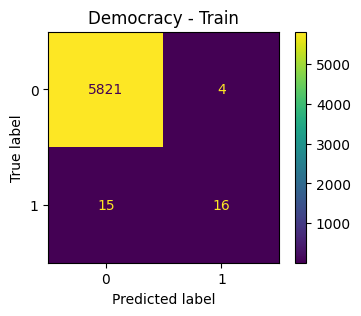

In [631]:
pred_train_dem_tree = dem_tree.predict(dem_xtrain_tree)

fig, ax = plt.subplots(figsize=(4, 3))
ConfusionMatrixDisplay(confusion_matrix(dem_ytrain, pred_train_dem_tree)).plot(ax=ax)
plt.title('Democracy - Train')

scores(dem_ytrain, pred_train_dem_tree)

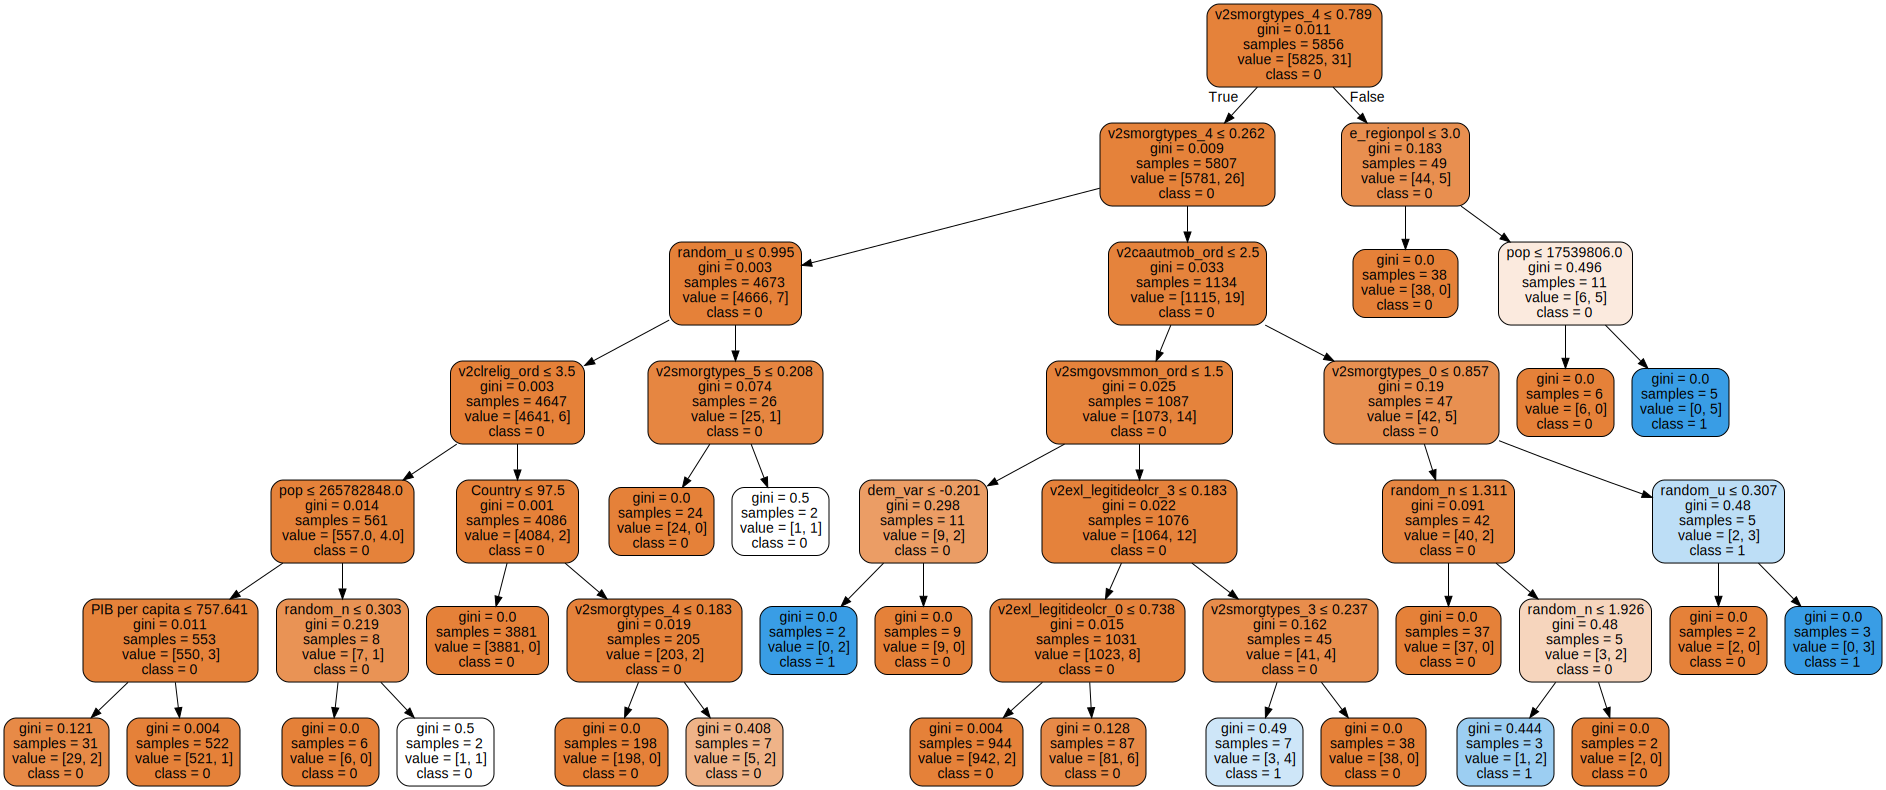

In [707]:
dot_data = tree.export_graphviz(dem_tree, # modelo
                                out_file = None, 
                                feature_names = dem_xtrain_tree.columns, # nome das features
                                class_names = ["0", "1"], # nome das classes de teste
                                filled = True, 
                                rounded = True,  
                                special_characters = True)

# dot_data = 'digraph Tree {\nsize="'+"10"+'";\n' + dot_data.split('\n', 1)[1] # Para melhor vizualização no Jupyter. O valor "10" é o tamanho
# Esse comando corta os gráficos, então eu tenho que lembrar de comentar essa linha se/quando for baixar

graph = graphviz.Source(dot_data)
graph.render("graph_dem_tree", format="png") # Download do gráfico 
graph

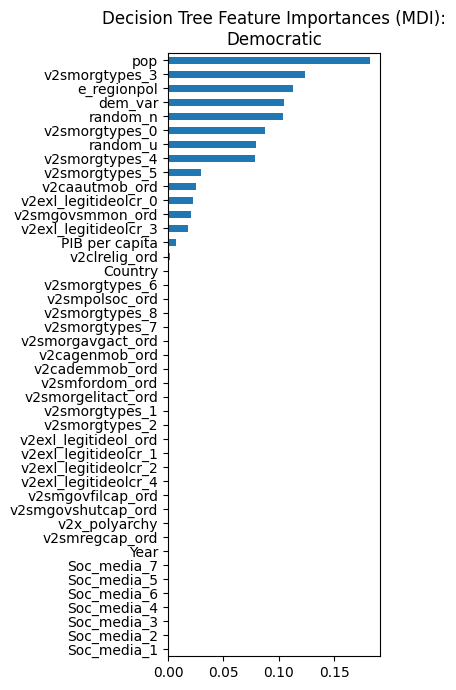

In [717]:
plt.figure(figsize=(4, 7))

mdi_importances = pd.Series(dem_tree.feature_importances_, 
                            index=dem_tree.feature_names_in_).sort_values(ascending=True)
ax = mdi_importances.plot.barh()
ax.set_title("Decision Tree Feature Importances (MDI):\nDemocratic")
ax.figure.tight_layout()

#### Teste

In [634]:
print(f'Quantos banimentos há para acertar: {dem_ytest.sum()}')

Quantos banimentos há para acertar: 16.0


{'Accuracy': 0.9948227797690163,
 'Precision': 0.7142857142857143,
 'Recall': 0.3125,
 'F1 Score': 0.43478260869565216}

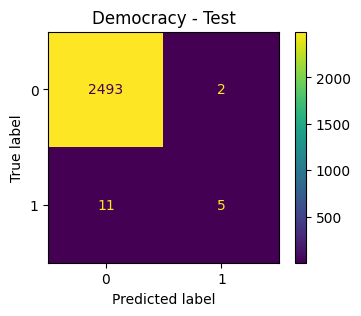

In [635]:
pred_test_dem_tree = dem_tree.predict(dem_xtest_tree)

fig, ax = plt.subplots(figsize=(4, 3))
ConfusionMatrixDisplay(confusion_matrix(dem_ytest, pred_test_dem_tree)).plot(ax=ax)
plt.title('Democracy - Test')

scores(dem_ytest, pred_test_dem_tree)

### Autocracias

#### Treino

In [636]:
# Sem GridSearchCV
aut_tree = tree.DecisionTreeClassifier(**hiperparams_tree_aut).fit(aut_xtrain_tree, aut_ytrain)

In [637]:
# grid_search_aut_tree = GridSearchCV(
#     estimator = tree.DecisionTreeClassifier(**hiperparams_tree),
#     param_grid = param_grid_tree,
#     scoring = 'f1',
#     cv = 5,
#     # verbose = 4,
#     n_jobs = -1,
#     error_score="raise"
# ).fit(aut_xtrain_tree, aut_ytrain)

In [638]:
# print("Best Parameters:", grid_search_aut_tree.best_params_)
# print(f"Best Cross-Validation Score: {grid_search_aut_tree.best_score_ :.5f}")

# aut_tree = grid_search_aut_tree.best_estimator_

In [639]:
print(f'Quantos banimentos há para acertar: {aut_ytrain.sum()}')

Quantos banimentos há para acertar: 426.0


{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0}

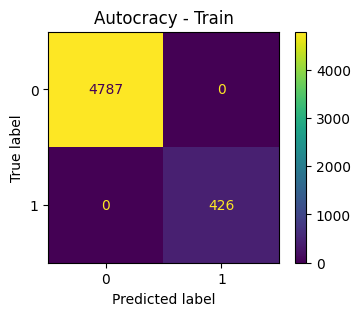

In [640]:
pred_train_aut_tree = aut_tree.predict(aut_xtrain_tree)

fig, ax = plt.subplots(figsize=(4, 3))
ConfusionMatrixDisplay(confusion_matrix(aut_ytrain, pred_train_aut_tree)).plot(ax=ax)
plt.title('Autocracy - Train')

scores(aut_ytrain, pred_train_aut_tree)

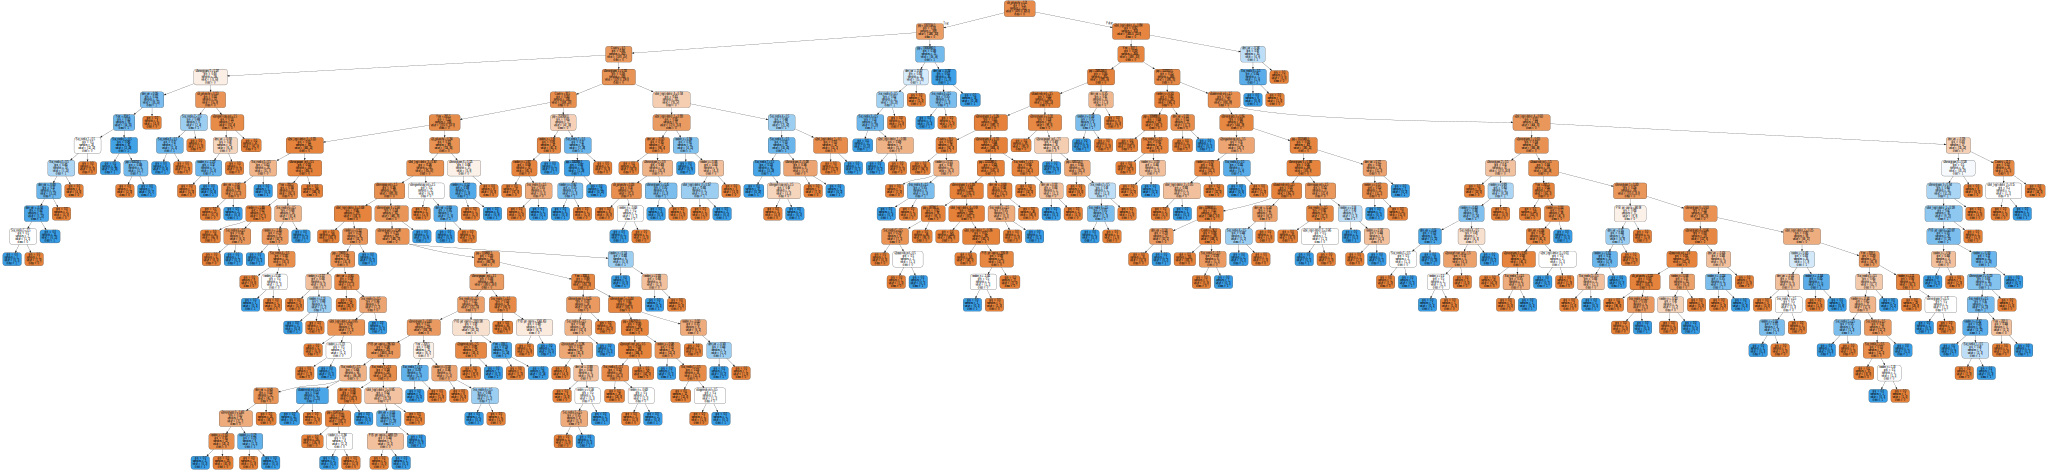

In [708]:
dot_data = tree.export_graphviz(aut_tree, # modelo
                                out_file = None, 
                                feature_names = aut_xtrain_tree.columns, # nome das features
                                class_names = ["0", "1"], # nome das calsses de teste
                                filled = True, 
                                rounded = True,  
                                special_characters = True)

# dot_data = 'digraph Tree {\nsize="'+"15"+'";\n' + dot_data.split('\n', 1)[1] # Para melhor vizualização no Jupyter. O valor "10" é o tamanho
# Esse comando corta os gráficos, então eu tenho que lembrar de comentar essa linha se/quando for baixar

graph = graphviz.Source(dot_data)
graph.render("graph_aut_tree", format="png") # Download do gráfico 
graph

In [642]:
aut_xtrain.loc[aut_xtrain_tree[aut_xtrain_tree["Country"] <= 4.5].index]["Country"].value_counts()

Country
Turkmenistan    69
Pakistan        67
Yemen           61
Sudan           61
Name: count, dtype: int64

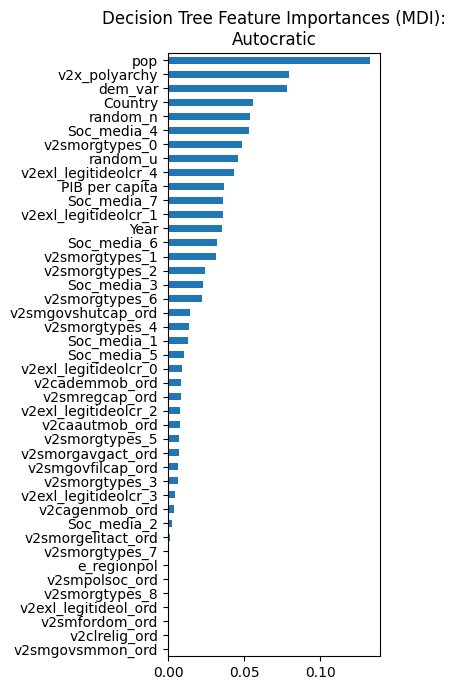

In [719]:
plt.figure(figsize=(4, 7))

mdi_importances = pd.Series(aut_tree.feature_importances_, 
                            index=aut_tree.feature_names_in_).sort_values(ascending=True)
ax = mdi_importances.plot.barh()
ax.set_title("Decision Tree Feature Importances (MDI):\nAutocratic")
ax.figure.tight_layout()

#### Teste

In [644]:
print(f'Quantos banimentos há para acertar: {aut_ytest.sum()}')

Quantos banimentos há para acertar: 194.0


{'Accuracy': 0.9534675615212528,
 'Precision': 0.7419354838709677,
 'Recall': 0.711340206185567,
 'F1 Score': 0.7263157894736842}

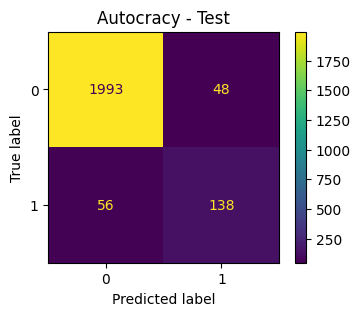

In [645]:
pred_test_aut_tree = aut_tree.predict(aut_xtest_tree)

fig, ax = plt.subplots(figsize=(4, 3))
ConfusionMatrixDisplay(confusion_matrix(aut_ytest, pred_test_aut_tree)).plot(ax=ax)
plt.title('Autocracy - Test')

scores(aut_ytest, pred_test_aut_tree)

### Geral

#### Treino

In [646]:
# Sem GridSearchCV
geral_tree = tree.DecisionTreeClassifier(**hiperparams_tree_geral).fit(geral_xtrain_tree, geral_ytrain)

In [647]:
# grid_search_geral_tree = GridSearchCV(
#     estimator = tree.DecisionTreeClassifier(**hiperparams_tree),
#     param_grid = param_grid_tree,
#     scoring = 'f1',
#     cv = 5,
#     # verbose = 4,
#     n_jobs = -1,
#     error_score="raise"
# ).fit(geral_xtrain_tree, geral_ytrain)

In [648]:
# print("Best Parameters:", grid_search_geral_tree.best_params_)
# print(f"Best Cross-Validation Score: {grid_search_geral_tree.best_score_ :.5f}")

# geral_tree = grid_search_geral_tree.best_estimator_

In [649]:
print(f'Quantos banimentos há para acertar: {geral_ytrain.sum()}')

Quantos banimentos há para acertar: 457.0


{'Accuracy': 0.994218086548017,
 'Precision': 0.9781021897810219,
 'Recall': 0.8796498905908097,
 'F1 Score': 0.9262672811059908}

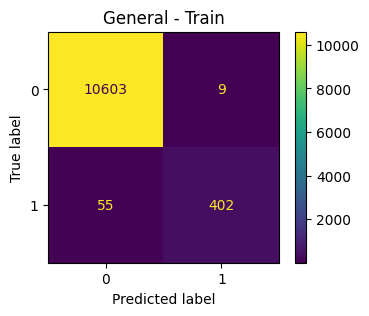

In [650]:
pred_train_geral_tree = geral_tree.predict(geral_xtrain_tree)

fig, ax = plt.subplots(figsize=(4, 3))
ConfusionMatrixDisplay(confusion_matrix(geral_ytrain, pred_train_geral_tree)).plot(ax=ax)
plt.title('General - Train')

scores(geral_ytrain, pred_train_geral_tree)

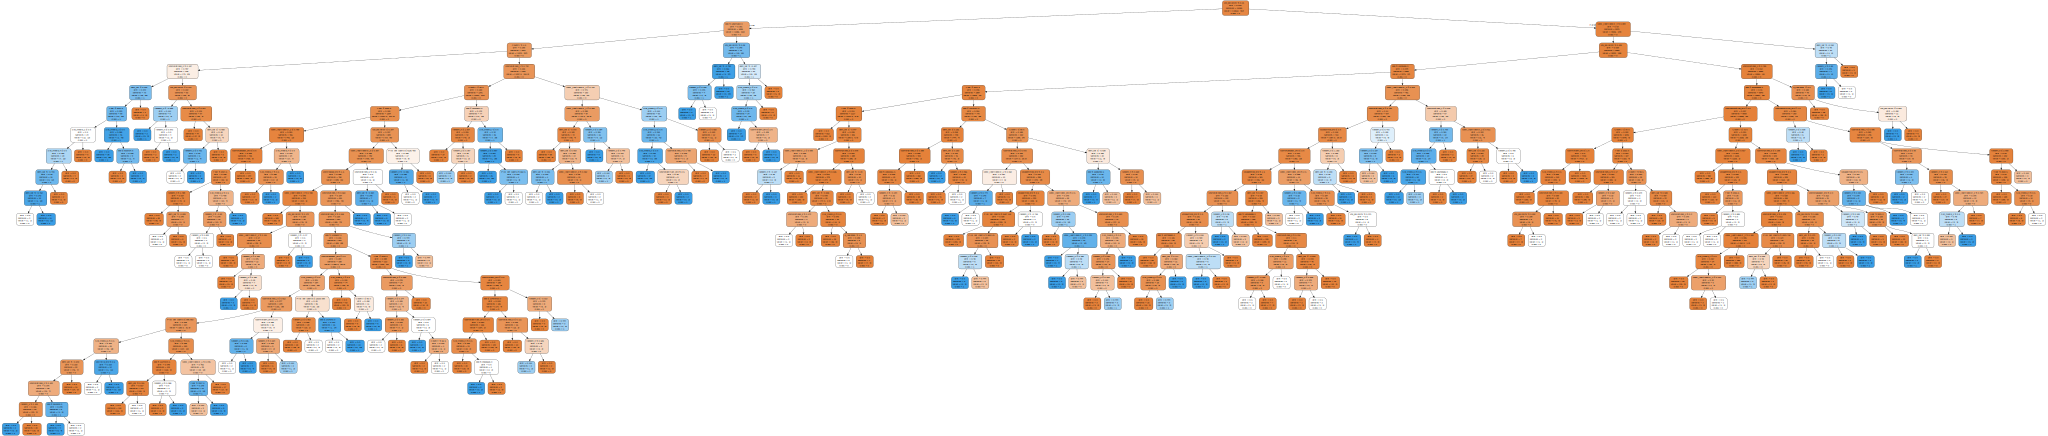

In [709]:
dot_data = tree.export_graphviz(geral_tree, # modelo
                                out_file = None, 
                                feature_names = geral_xtrain_tree.columns, # nome das features
                                class_names = ["0", "1"], # nome das calsses de teste
                                filled = True, 
                                rounded = True,  
                                special_characters = True)

# dot_data = 'digraph Tree {\nsize="'+"20"+'";\n' + dot_data.split('\n', 1)[1] # Para melhor vizualização no Jupyter. O valor "10" é o tamanho
# Esse comando corta os gráficos, então eu tenho que lembrar de comentar essa linha se/quando for baixar

graph = graphviz.Source(dot_data)
graph.render("graph_geral_tree", format="png") # Download do gráfico 
graph

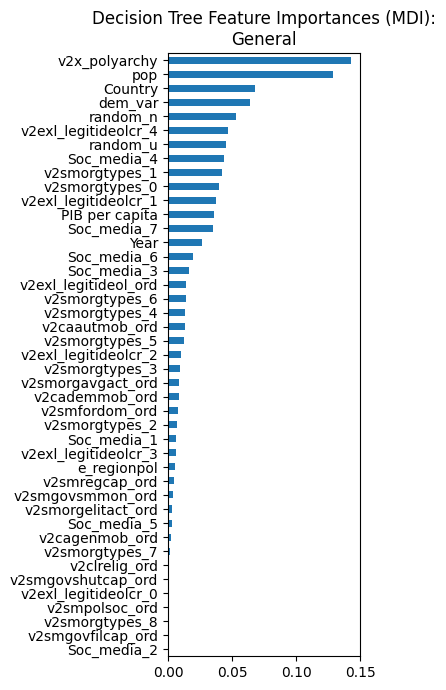

In [720]:
plt.figure(figsize=(4, 7))

mdi_importances = pd.Series(geral_tree.feature_importances_, 
                            index=geral_tree.feature_names_in_).sort_values(ascending=True)
ax = mdi_importances.plot.barh()
ax.set_title("Decision Tree Feature Importances (MDI):\nGeneral")
ax.figure.tight_layout()

#### Teste

In [653]:
print(f'Quantos banimentos há para acertar: {geral_ytest.sum()}')

Quantos banimentos há para acertar: 210.0


{'Accuracy': 0.9770332911925832,
 'Precision': 0.791907514450867,
 'Recall': 0.6523809523809524,
 'F1 Score': 0.7154046997389034}

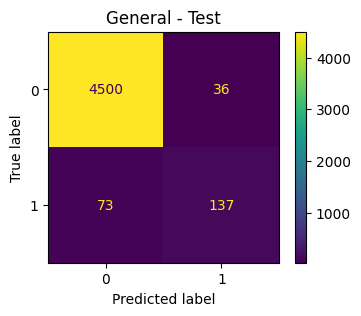

In [654]:
pred_test_geral_tree = geral_tree.predict(geral_xtest_tree)

fig, ax = plt.subplots(figsize=(4, 3))
ConfusionMatrixDisplay(confusion_matrix(geral_ytest, pred_test_geral_tree)).plot(ax=ax)
plt.title('General - Test')

scores(geral_ytest, pred_test_geral_tree)

### Cross-Comparison

#### Modelo Democrático

Quantos banimentos há para acertar: 194.0


{'Accuracy': 0.8420581655480984,
 'Precision': 0.10050251256281408,
 'Recall': 0.10309278350515463,
 'F1 Score': 0.10178117048346055}

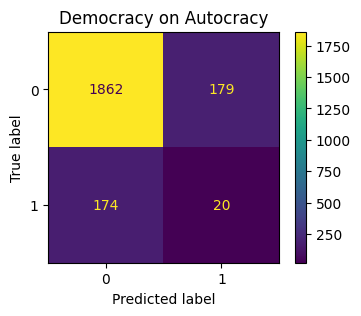

In [655]:
# modelo democrático nos dados autocráticos
print(f'Quantos banimentos há para acertar: {aut_ytest.sum()}')
pred_test_demXaut_tree = dem_tree.predict(aut_xtest_tree)

fig, ax = plt.subplots(figsize=(4, 3))
ConfusionMatrixDisplay(confusion_matrix(aut_ytest, pred_test_demXaut_tree)).plot(ax=ax)
plt.title('Democracy on Autocracy')

scores(aut_ytest, pred_test_demXaut_tree)

#### Modelo Autocrático

Quantos banimentos há para acertar: 16.0


{'Accuracy': 0.9729191557148547,
 'Precision': 0.0,
 'Recall': 0.0,
 'F1 Score': 0.0}

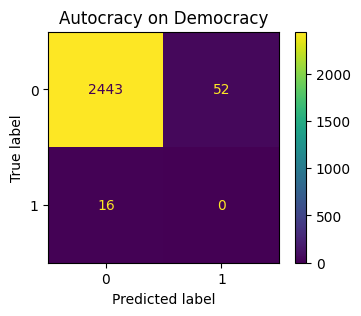

In [656]:
# modelo autocrático nos dados democráticos
print(f'Quantos banimentos há para acertar: {dem_ytest.sum()}')
pred_test_autXdem_tree = aut_tree.predict(dem_xtest_tree)

fig, ax = plt.subplots(figsize=(4, 3))
ConfusionMatrixDisplay(confusion_matrix(dem_ytest, pred_test_autXdem_tree)).plot(ax=ax)
plt.title('Autocracy on Democracy')

scores(dem_ytest, pred_test_autXdem_tree)

#### Modelo Geral

Quantos banimentos há para acertar: 16.0


{'Accuracy': 0.996415770609319,
 'Precision': 0.8181818181818182,
 'Recall': 0.5625,
 'F1 Score': 0.6666666666666666}

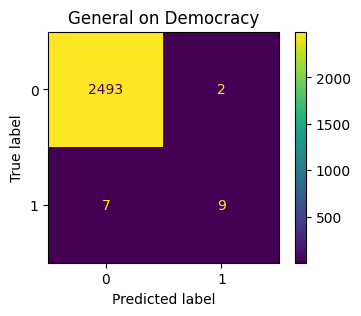

In [657]:
# modelo geral nos dados democráticos
print(f'Quantos banimentos há para acertar: {dem_ytest.sum()}')
pred_test_geralXdem_tree = geral_tree.predict(dem_xtest_tree)

fig, ax = plt.subplots(figsize=(4, 3))
ConfusionMatrixDisplay(confusion_matrix(dem_ytest, pred_test_geralXdem_tree)).plot(ax=ax)
plt.title('General on Democracy')

scores(dem_ytest, pred_test_geralXdem_tree)

Quantos banimentos há para acertar: 194.0


{'Accuracy': 0.9552572706935123,
 'Precision': 0.7901234567901234,
 'Recall': 0.6597938144329897,
 'F1 Score': 0.7191011235955056}

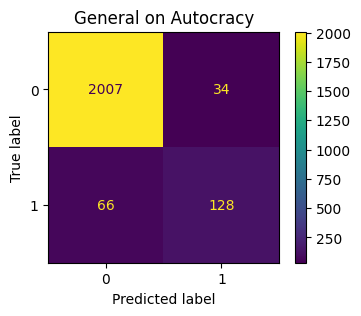

In [658]:
# modelo geral nos dados autocráticos
print(f'Quantos banimentos há para acertar: {aut_ytest.sum()}')
pred_test_geralXaut_tree = geral_tree.predict(aut_xtest_tree)

fig, ax = plt.subplots(figsize=(4, 3))
ConfusionMatrixDisplay(confusion_matrix(aut_ytest, pred_test_geralXaut_tree)).plot(ax=ax)
plt.title('General on Autocracy')

scores(aut_ytest, pred_test_geralXaut_tree)

### Comparação entre scores de modelos:

In [659]:
for c, i in enumerate([      pred_test_dem_tree,   pred_test_demXaut_tree, 
                         pred_test_autXdem_tree,       pred_test_aut_tree,
                       pred_test_geralXdem_tree, pred_test_geralXaut_tree]):
    print(f'> Modelo {"democrático" if c < 2 else "autocrático" if c < 4 else "geral"} em dados {"democrático" if c % 2 == 0 else "autocrático"}s:',
          f'\n   F1 Score: {scores(dem_ytest if c % 2 == 0 else aut_ytest, i)["F1 Score"]:.5f}'.rstrip('0').rstrip('.') + '\n')

> Modelo democrático em dados democráticos: 
   F1 Score: 0.43478

> Modelo democrático em dados autocráticos: 
   F1 Score: 0.10178

> Modelo autocrático em dados democráticos: 
   F1 Score: 0

> Modelo autocrático em dados autocráticos: 
   F1 Score: 0.72632

> Modelo geral em dados democráticos: 
   F1 Score: 0.66667

> Modelo geral em dados autocráticos: 
   F1 Score: 0.7191



O modelo geral é melhor (mesmo que marginalmente) que os modelos democrático e autocrático.

O modelo sem GridSearchCV performa marginalmente melhor nos modelos individuais (dem e aut), mas pior no modelo geral (aplicado aos dados individuais)

A primeira divisão e algumas das seguintes são com base nos valores de democracia (polyarchy ou dem_var), indicando que o nível de democracia é relevante na decisão de baniemnto ou não. Para o modelo democrático, a variável de dem_var ou polyarchy é bem menos relevante que nos outros modelos

## Random Forest

In [660]:
from sklearn.ensemble import RandomForestClassifier

In [661]:
hiperparams_rf = {
    'random_state': 1234
}

hiperparams_rf_dem = {     # Best Cross-Validation Score: 0.48273
    'random_state': 1234,
    'max_depth': 10, 
    'max_features': 'log2', 
    'min_samples_leaf': 1, 
    'min_samples_split': 3, 
    'n_estimators': 100
}

hiperparams_rf_aut = {     # Best Cross-Validation Score: 0.72607
    'random_state': 1234,
    'max_depth': 50, 
    'max_features': None, 
    'min_samples_leaf': 1, 
    'min_samples_split': 2, 
    'n_estimators': 800
}

hiperparams_rf_geral = {   # Best Cross-Validation Score: 0.68757
    'random_state': 1234,
    'max_depth': 50,
    'max_features': None, 
    'min_samples_leaf': 1, 
    'min_samples_split': 2, 
    'n_estimators': 300
}

In [662]:
param_grid_rf = {
    'n_estimators': [100, 300, 500, 800, 1100],
    'max_features': ['log2', 'sqrt', 0.5, None],
    'max_depth': [5, 10, 15, 50, None],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 5]
}

### Democracias

#### Treino

In [663]:
# Sem GridSearchCV
dem_rf = RandomForestClassifier(**hiperparams_rf_dem).fit(dem_xtrain_tree, dem_ytrain)

In [664]:
# grid_search_dem_rf = GridSearchCV(
#     estimator = RandomForestClassifier(**hiperparams_rf),
#     param_grid = param_grid_rf,
#     scoring = 'f1',
#     cv = 5,
#     # verbose = 4,
#     n_jobs = -1,
#     error_score="raise"
# ).fit(dem_xtrain_tree, dem_ytrain)

In [665]:
# print("Best Parameters:", grid_search_dem_rf.best_params_)
# print(f"Best Cross-Validation Score: {grid_search_dem_rf.best_score_ :.5f}")

# dem_rf = grid_search_dem_rf.best_estimator_

In [666]:
print(f'Quantos banimentos há para acertar: {dem_ytrain.sum()}')

Quantos banimentos há para acertar: 31.0


{'Accuracy': 0.9989754098360656,
 'Precision': 1.0,
 'Recall': 0.8064516129032258,
 'F1 Score': 0.8928571428571429}

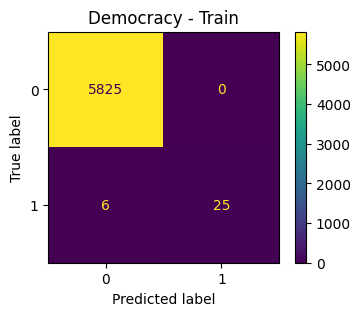

In [667]:
pred_train_dem_rf = dem_rf.predict(dem_xtrain_tree)

fig, ax = plt.subplots(figsize=(4, 3))
ConfusionMatrixDisplay(confusion_matrix(dem_ytrain, pred_train_dem_rf)).plot(ax=ax)
plt.title('Democracy - Train')

scores(dem_ytrain, pred_train_dem_rf)

#### Teste

In [668]:
print(f'Quantos banimentos há para acertar: {dem_ytest.sum()}')

Quantos banimentos há para acertar: 16.0


{'Accuracy': 0.9944245320589407,
 'Precision': 0.6666666666666666,
 'Recall': 0.25,
 'F1 Score': 0.36363636363636365}

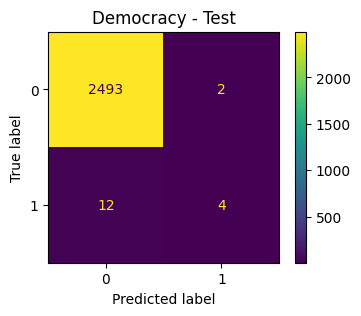

In [669]:
pred_test_dem_rf = dem_rf.predict(dem_xtest_tree)

fig, ax = plt.subplots(figsize=(4, 3))
ConfusionMatrixDisplay(confusion_matrix(dem_ytest, pred_test_dem_rf)).plot(ax=ax)
plt.title('Democracy - Test')

scores(dem_ytest, pred_test_dem_rf)

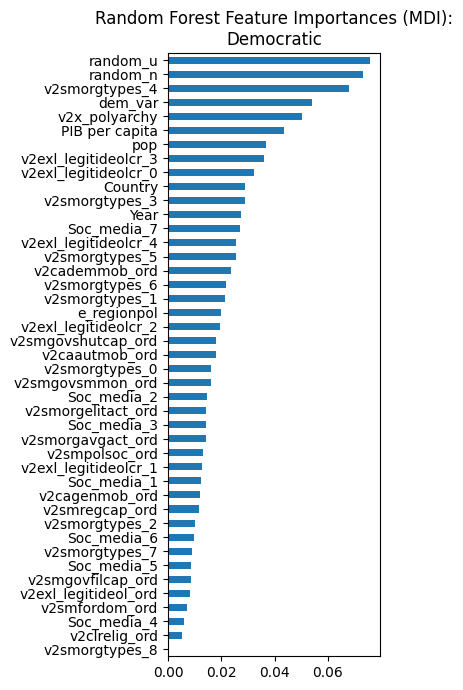

In [721]:
plt.figure(figsize=(4, 7))

mdi_importances = pd.Series(dem_rf.feature_importances_, 
                            index=dem_rf.feature_names_in_).sort_values(ascending=True)
ax = mdi_importances.plot.barh()
ax.set_title("Random Forest Feature Importances (MDI):\nDemocratic")
ax.figure.tight_layout()

### Autocracias

#### Treino

In [671]:
# Sem GridSearchCV
aut_rf = RandomForestClassifier(**hiperparams_rf_aut).fit(aut_xtrain_tree, aut_ytrain)

In [672]:
# grid_search_aut_rf = GridSearchCV(
#     estimator = RandomForestClassifier(**hiperparams_rf),
#     param_grid = param_grid_rf,
#     scoring = 'f1',
#     cv = 5,
#     # verbose = 4,
#     n_jobs = -1,
#     error_score="raise"
# ).fit(aut_xtrain_tree, aut_ytrain)

In [673]:
# print("Best Parameters:", grid_search_aut_rf.best_params_)
# print(f"Best Cross-Validation Score: {grid_search_aut_rf.best_score_ :.5f}")

# aut_rf = grid_search_aut_rf.best_estimator_

In [674]:
print(f'Quantos banimentos há para acertar: {aut_ytrain.sum()}')

Quantos banimentos há para acertar: 426.0


{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0}

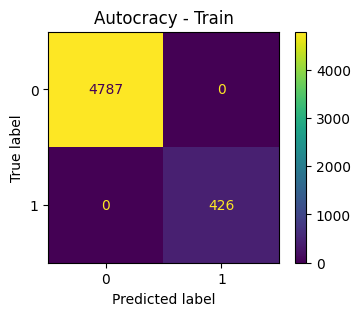

In [675]:
pred_train_aut_rf = aut_rf.predict(aut_xtrain_tree)

fig, ax = plt.subplots(figsize=(4, 3))
ConfusionMatrixDisplay(confusion_matrix(aut_ytrain, pred_train_aut_rf)).plot(ax=ax)
plt.title('Autocracy - Train')

scores(aut_ytrain, pred_train_aut_rf)

#### Teste

In [676]:
print(f'Quantos banimentos há para acertar: {aut_ytest.sum()}')

Quantos banimentos há para acertar: 194.0


{'Accuracy': 0.9615212527964205,
 'Precision': 0.8802816901408451,
 'Recall': 0.6443298969072165,
 'F1 Score': 0.7440476190476191}

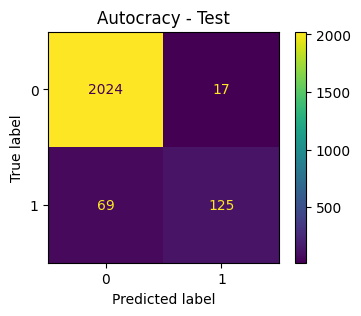

In [677]:
pred_test_aut_rf = aut_rf.predict(aut_xtest_tree)

fig, ax = plt.subplots(figsize=(4, 3))
ConfusionMatrixDisplay(confusion_matrix(aut_ytest, pred_test_aut_rf)).plot(ax=ax)
plt.title('Autocracy - Test')

scores(aut_ytest, pred_test_aut_rf)

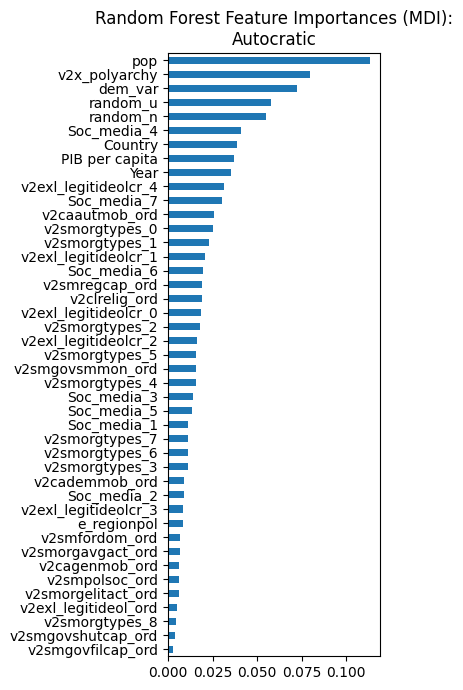

In [722]:
plt.figure(figsize=(4, 7))

mdi_importances = pd.Series(aut_rf.feature_importances_, 
                            index=aut_rf.feature_names_in_).sort_values(ascending=True)
ax = mdi_importances.plot.barh()
ax.set_title("Random Forest Feature Importances (MDI):\nAutocratic")
ax.figure.tight_layout()

### Geral

#### Treino

In [679]:
# Sem GridSearchCV
geral_rf = RandomForestClassifier(**hiperparams_rf_geral).fit(geral_xtrain_tree, geral_ytrain)

In [680]:
# grid_search_geral_rf = GridSearchCV(
#     estimator = RandomForestClassifier(**hiperparams_rf),
#     param_grid = param_grid_rf,
#     scoring = 'f1',
#     cv = 5,
#     # verbose = 4,
#     n_jobs = -1,
#     error_score="raise"
# ).fit(geral_xtrain_tree, geral_ytrain)

In [681]:
# print("Best Parameters:", grid_search_geral_rf.best_params_)
# print(f"Best Cross-Validation Score: {grid_search_geral_rf.best_score_ :.5f}")

# geral_rf = grid_search_geral_rf.best_estimator_

In [682]:
print(f'Quantos banimentos há para acertar: {geral_ytrain.sum()}')

Quantos banimentos há para acertar: 457.0


{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0}

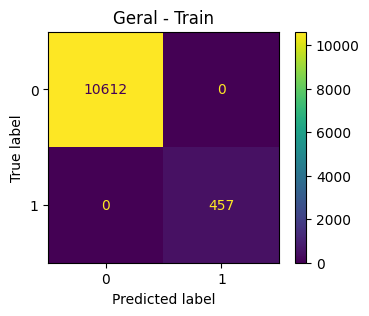

In [683]:
pred_train_geral_rf = geral_rf.predict(geral_xtrain_tree)

fig, ax = plt.subplots(figsize=(4, 3))
ConfusionMatrixDisplay(confusion_matrix(geral_ytrain, pred_train_geral_rf)).plot(ax=ax)
plt.title('Geral - Train')

scores(geral_ytrain, pred_train_geral_rf)

#### Teste

In [684]:
print(f'Quantos banimentos há para acertar: {geral_ytest.sum()}')

Quantos banimentos há para acertar: 210.0


{'Accuracy': 0.9782975136957438,
 'Precision': 0.8543046357615894,
 'Recall': 0.6142857142857143,
 'F1 Score': 0.7146814404432132}

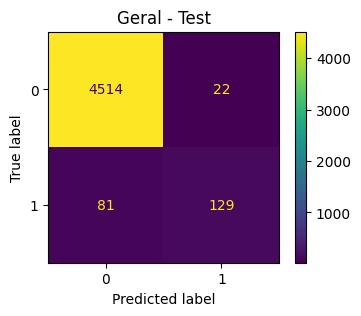

In [685]:
pred_test_geral_rf = geral_rf.predict(geral_xtest_tree)

fig, ax = plt.subplots(figsize=(4, 3))
ConfusionMatrixDisplay(confusion_matrix(geral_ytest, pred_test_geral_rf)).plot(ax=ax)
plt.title('Geral - Test')

scores(geral_ytest, pred_test_geral_rf)

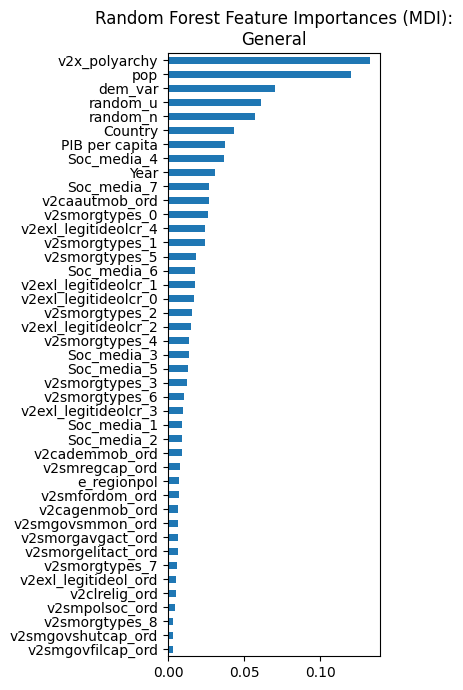

In [723]:
plt.figure(figsize=(4, 7))

mdi_importances = pd.Series(geral_rf.feature_importances_, 
                            index=geral_rf.feature_names_in_).sort_values(ascending=True)
ax = mdi_importances.plot.barh()
ax.set_title("Random Forest Feature Importances (MDI):\nGeneral")
ax.figure.tight_layout()

### Cross-Comparison

#### Modelo Democrático

Quantos banimentos há para acertar: 194.0


{'Accuracy': 0.9131991051454139,
 'Precision': 0.0,
 'Recall': 0.0,
 'F1 Score': 0.0}

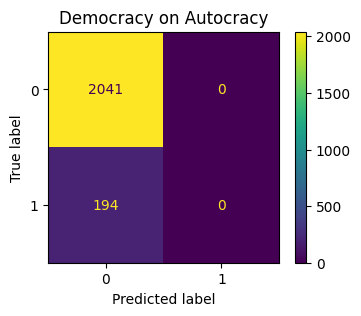

In [687]:
# modelo democrático nos dados autocráticos
print(f'Quantos banimentos há para acertar: {aut_ytest.sum()}')
pred_test_demXaut_rf = dem_rf.predict(aut_xtest_tree)

fig, ax = plt.subplots(figsize=(4, 3))
ConfusionMatrixDisplay(confusion_matrix(aut_ytest, pred_test_demXaut_rf)).plot(ax=ax)
plt.title('Democracy on Autocracy')

scores(aut_ytest, pred_test_demXaut_rf)

#### Modelo Autocrático

Quantos banimentos há para acertar: 16.0


{'Accuracy': 0.9936280366387893,
 'Precision': 0.0,
 'Recall': 0.0,
 'F1 Score': 0.0}

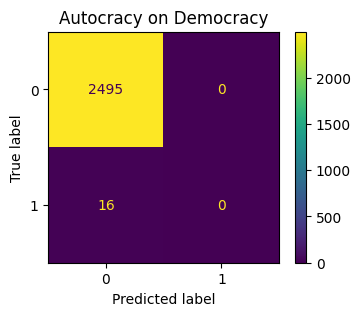

In [688]:
# modelo autocrático nos dados democráticos
print(f'Quantos banimentos há para acertar: {dem_ytest.sum()}')
pred_test_autXdem_rf = aut_rf.predict(dem_xtest_tree)

fig, ax = plt.subplots(figsize=(4, 3))
ConfusionMatrixDisplay(confusion_matrix(dem_ytest, pred_test_autXdem_rf)).plot(ax=ax)
plt.title('Autocracy on Democracy')

scores(dem_ytest, pred_test_autXdem_rf)

#### Modelo Geral

Quantos banimentos há para acertar: 16.0


{'Accuracy': 0.9948227797690163,
 'Precision': 0.7142857142857143,
 'Recall': 0.3125,
 'F1 Score': 0.43478260869565216}

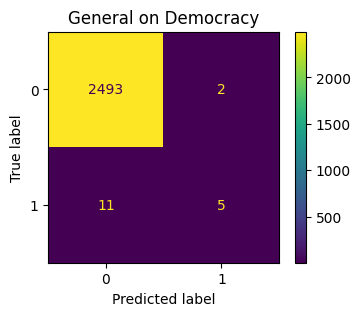

In [689]:
# modelo geral nos dados democráticos
print(f'Quantos banimentos há para acertar: {dem_ytest.sum()}')
pred_test_geralXdem_rf = geral_rf.predict(dem_xtest_tree)

fig, ax = plt.subplots(figsize=(4, 3))
ConfusionMatrixDisplay(confusion_matrix(dem_ytest, pred_test_geralXdem_rf)).plot(ax=ax)
plt.title('General on Democracy')

scores(dem_ytest, pred_test_geralXdem_rf)

Quantos banimentos há para acertar: 194.0


{'Accuracy': 0.959731543624161,
 'Precision': 0.8611111111111112,
 'Recall': 0.6391752577319587,
 'F1 Score': 0.7337278106508875}

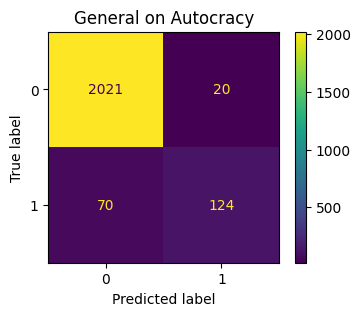

In [690]:
# modelo geral nos dados autocráticos
print(f'Quantos banimentos há para acertar: {aut_ytest.sum()}')
pred_test_geralXaut_rf = geral_rf.predict(aut_xtest_tree)

fig, ax = plt.subplots(figsize=(4, 3))
ConfusionMatrixDisplay(confusion_matrix(aut_ytest, pred_test_geralXaut_rf)).plot(ax=ax)
plt.title('General on Autocracy')

scores(aut_ytest, pred_test_geralXaut_rf)

### Comparação entre scores de modelos:

In [691]:
for c, i in enumerate([      pred_test_dem_rf,   pred_test_demXaut_rf, 
                         pred_test_autXdem_rf,       pred_test_aut_rf,
                       pred_test_geralXdem_rf, pred_test_geralXaut_rf]):
    print(f'> Modelo {"democrático" if c < 2 else "autocrático" if c < 4 else "geral"} em dados {"democrático" if c % 2 == 0 else "autocrático"}s:',
          f'\n   F1 Score: {scores(dem_ytest if c % 2 == 0 else aut_ytest, i)["F1 Score"]}\n')

> Modelo democrático em dados democráticos: 
   F1 Score: 0.36363636363636365

> Modelo democrático em dados autocráticos: 
   F1 Score: 0.0

> Modelo autocrático em dados democráticos: 
   F1 Score: 0.0

> Modelo autocrático em dados autocráticos: 
   F1 Score: 0.7440476190476191

> Modelo geral em dados democráticos: 
   F1 Score: 0.43478260869565216

> Modelo geral em dados autocráticos: 
   F1 Score: 0.7337278106508875



O modelo geral é melhor (mesmo que marginalmente) que os modelos democrático e autocrático.

## Regressão X Árvore X Random Forest

In [692]:
for c, i in enumerate([      pred_test_dem_reg,       pred_test_dem_tree,       pred_test_dem_rf,     pred_test_demXaut_reg,   pred_test_demXaut_tree,   pred_test_demXaut_rf,   # Modelo democrático
                         pred_test_autXdem_reg,   pred_test_autXdem_tree,   pred_test_autXdem_rf,         pred_test_aut_reg,       pred_test_aut_tree,       pred_test_aut_rf,   # Modelo autocrático
                       pred_test_geralXdem_reg, pred_test_geralXdem_tree, pred_test_geralXdem_rf,   pred_test_geralXaut_reg, pred_test_geralXaut_tree, pred_test_geralXaut_rf]): # Modelo geral
    print(f'> Modelo {"democrático" if c < 6 else "autocrático" if c < 12 else "geral"} em dados {"democrático" if c % 6 < 3 else "autocrático"}s:' if c % 3 == 0 else '',
          f'\n    F1 Score:\n\n' if c % 3 == 0 else '',
          f'    {"     Regressão" if c % 3 == 0 else "       Árvore" if c % 3 == 1 else "Random Forest"}: {scores(dem_ytest if c % 6 < 3 else aut_ytest, i)["F1 Score"] :.3f}',
          '\n' if c % 3 == 2 else '')

> Modelo democrático em dados democráticos: 
    F1 Score:

          Regressão: 0.040 
             Árvore: 0.435 
      Random Forest: 0.364 

> Modelo democrático em dados autocráticos: 
    F1 Score:

          Regressão: 0.178 
             Árvore: 0.102 
      Random Forest: 0.000 

> Modelo autocrático em dados democráticos: 
    F1 Score:

          Regressão: 0.027 
             Árvore: 0.000 
      Random Forest: 0.000 

> Modelo autocrático em dados autocráticos: 
    F1 Score:

          Regressão: 0.410 
             Árvore: 0.726 
      Random Forest: 0.744 

> Modelo geral em dados democráticos: 
    F1 Score:

          Regressão: 0.075 
             Árvore: 0.667 
      Random Forest: 0.435 

> Modelo geral em dados autocráticos: 
    F1 Score:

          Regressão: 0.343 
             Árvore: 0.719 
      Random Forest: 0.734 



O modelo de árvore performa um pouco melhor que o modelo de floresta para os dados autocráticos, já o modelo de floresta performa um pouco melhor que o de árvore para os dados democráticos.

E, novamente, o modelo geral é um pouco superior aos modelos específicos (democrático e autocrático) para qualquer um dos casos.


Correção (21/11/24):

O modelo de floresta performa sempre melhor que o de árvore, com exceção do modelo de árvore geral aplicado aos dados democráticos.
O modelo geral é sempre melhor que os específicos, exceto para o modelo de floresta geral em dados democráticos, caso para o qual o modelo democrático é melhor, mas o modelo de árvore geral performa ainda melhor.

### Feature Importances

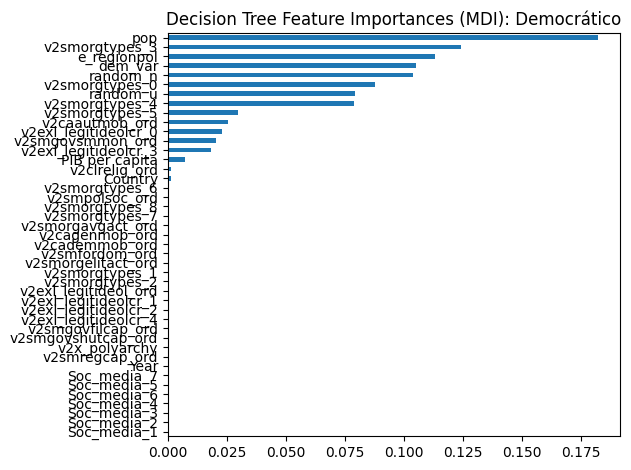

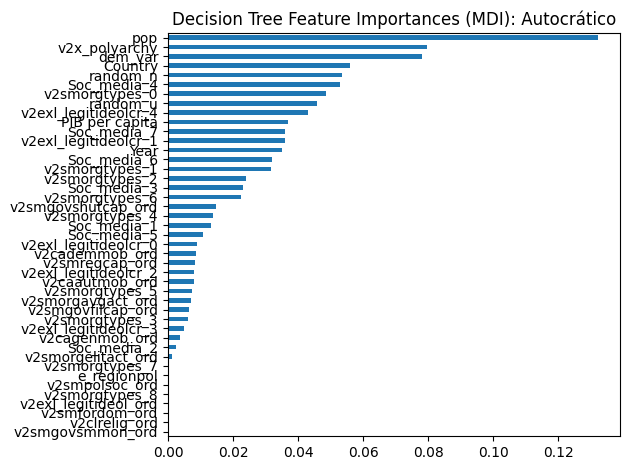

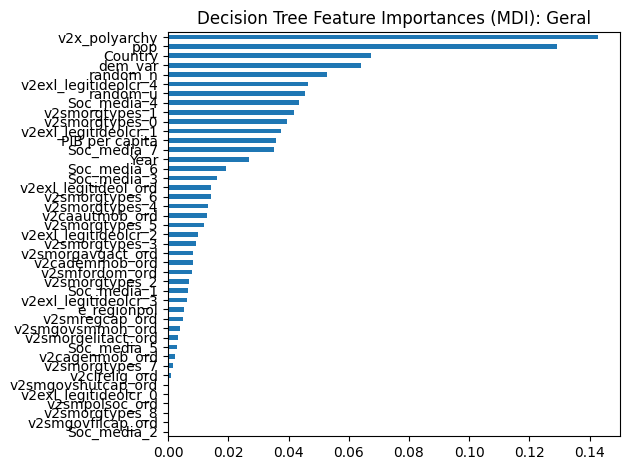

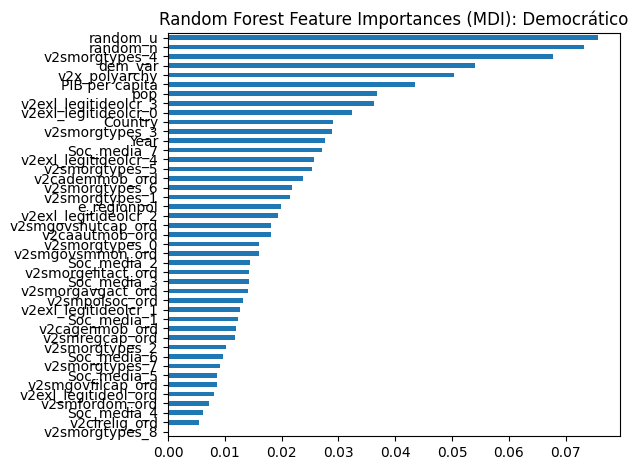

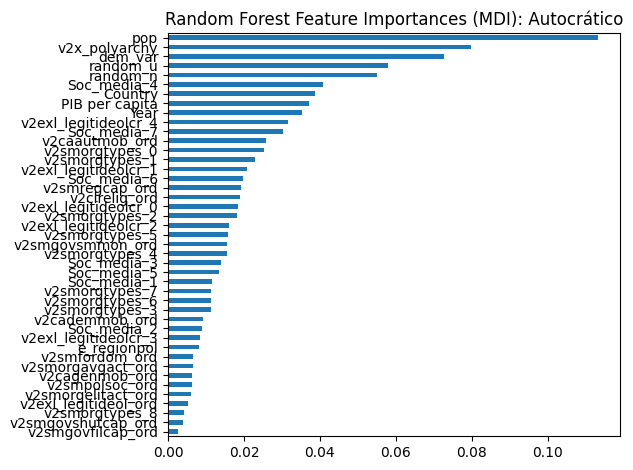

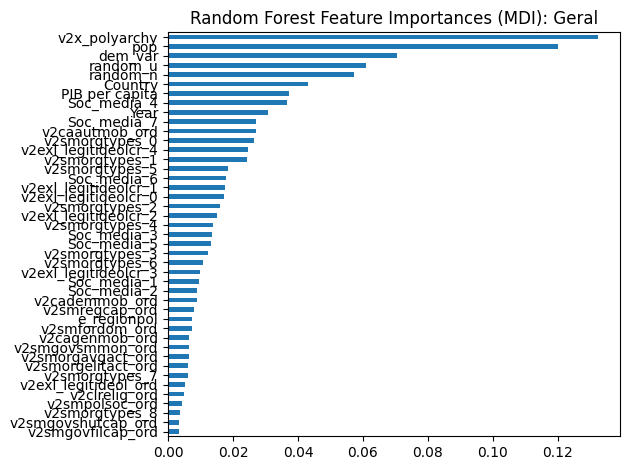

In [693]:
for c, modelo in enumerate([dem_tree, aut_tree, geral_tree, 
                            dem_rf,   aut_rf,   geral_rf]):
    mdi_importances = pd.Series(modelo.feature_importances_, 
                            index=modelo.feature_names_in_).sort_values()
    ax = mdi_importances.plot.barh()
    ax.set_title(f"{"Decision Tree" if c < 3 else "Random Forest"} Feature Importances (MDI): {"Democrático" if c % 3 == 0 else "Autocrático" if c % 3 == 1 else "Geral"}")
    ax.figure.tight_layout()
    plt.show()

In [694]:
for c, modelo in enumerate([dem_tree, aut_tree, geral_tree, 
                            dem_rf,   aut_rf,   geral_rf]):
    mdi_importances = pd.Series(modelo.feature_importances_, 
                            index=modelo.feature_names_in_).sort_values(ascending=False)
    print(f'{"Modelo Democrático" if c % 3 == 0 else "Modelo Autocrático" if c % 3 == 1 else "Modelo Geral"}\n{modelo}:\n{mdi_importances.head(10)}\n')

Modelo Democrático
DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, random_state=1234):
pop               0.182341
v2smorgtypes_3    0.123924
e_regionpol       0.113161
dem_var           0.105061
random_n          0.103567
v2smorgtypes_0    0.087531
random_u          0.079338
v2smorgtypes_4    0.078768
v2smorgtypes_5    0.029633
v2caautmob_ord    0.025289
dtype: float64

Modelo Autocrático
DecisionTreeClassifier(max_depth=21, random_state=1234):
pop                     0.132444
v2x_polyarchy           0.079600
dem_var                 0.077990
Country                 0.055996
random_n                0.053594
Soc_media_4             0.052792
v2smorgtypes_0          0.048625
random_u                0.045829
v2exl_legitideolcr_4    0.042945
PIB per capita          0.036783
dtype: float64

Modelo Geral
DecisionTreeClassifier(max_depth=21, min_samples_leaf=2, random_state=1234):
v2x_polyarchy           0.142957
pop                     0.129051
Country                 0.067526
dem_var 

In [695]:
# # Salvando gráficos
# graf.savefig("heatmap_full.png", format="png", dpi=300, bbox_inches="tight")

In [696]:
# # Feature Importance com indicadores de margem de erro 

# importances = dem_rf.feature_importances_ # aqui é o modelo dem
# std = np.std([tree.feature_importances_ for tree in dem_rf.estimators_], axis=0)

# forest_importances = pd.Series(importances, index=dem_rf.feature_names_in_)

# fig, ax = plt.subplots()
# forest_importances.plot.bar(yerr=std, ax=ax)
# ax.set_title("Feature importances using MDI")
# ax.set_ylabel("Mean decrease in impurity")
# fig.tight_layout()

In [697]:
# # Alternativa para Feature Importance, chamada Permutation Importance, que avalia a importância das features para a performance (no caso F1) do modelo,
# # e não para a MDI (Mean Decrease in Impurity), que possui viés para features com alta cardinalidade

# from sklearn.inspection import permutation_importance

# train_result = permutation_importance(dem_rf, dem_xtrain_tree, dem_ytrain, # aqui é o modelo dem em dados dem
#                                       scoring='f1',
#                                       n_repeats=50, 
#                                       random_state=1234,
#                                       n_jobs=-1)

# test_results = permutation_importance(dem_rf, dem_xtest_tree, dem_ytest, # aqui é o modelo dem em dados dem
#                                       scoring='f1',
#                                       n_repeats=50, 
#                                       random_state=1234,
#                                       n_jobs=-1)

# sorted_importances_idx = train_result.importances_mean.argsort()

# train_importances = pd.DataFrame(
#     train_result.importances[sorted_importances_idx].T,
#     columns=dem_xtrain_tree.columns[sorted_importances_idx], # dem_xtrain_tree, para pegar os nomes das features (soc_media virou soc_media_0, 1, 2 ...)
# )

# test_importances = pd.DataFrame(
#     test_results.importances[sorted_importances_idx].T,
#     columns=dem_xtrain_tree.columns[sorted_importances_idx], # dem_xtrain_tree, para pegar os nomes das features (soc_media virou soc_media_0, 1, 2 ...)
# )

# for name, importances in zip(["train", "test"], [train_importances, test_importances]):
#     ax = importances.plot.box(vert=False, whis=10)
#     ax.set_title(f"Permutation Importances ({name} set)")
#     ax.set_xlabel("Decrease in accuracy score")
#     ax.axvline(x=0, color="k", linestyle="--")
#     ax.figure.tight_layout()

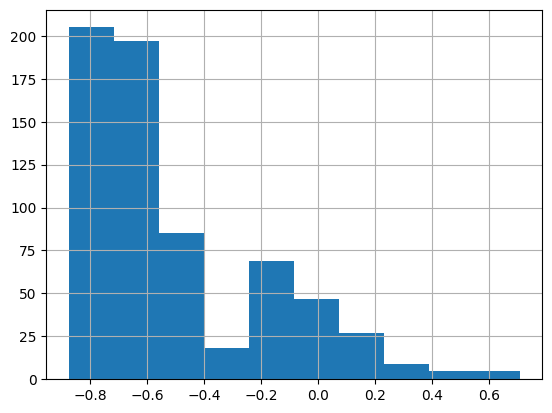

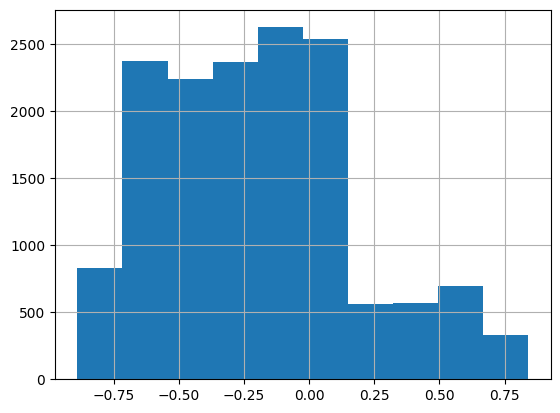

In [698]:
base[base["Banned"] == 1]['dem_var'].hist()
plt.show()

base[base["Banned"] == 0]['dem_var'].hist()
plt.show()

[0, 1]:
dem_var      -0.5283000000000001
v2x_polyarchy 0.1836774193548387


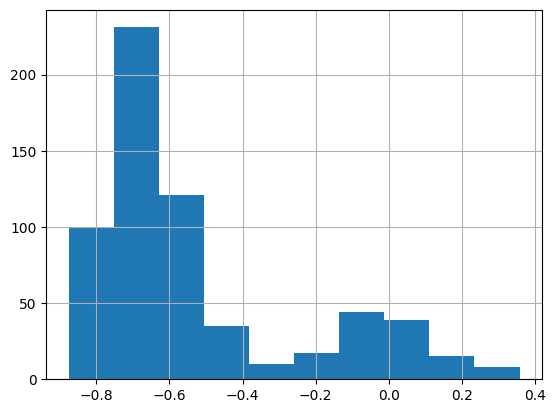

[2, 3]:
dem_var      -0.026361702127659585
v2x_polyarchy 0.6464042553191489


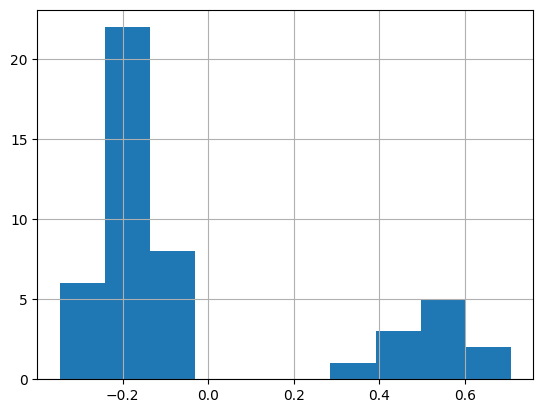

In [699]:
# for i in [0, 1, 2, 3]:
#     print(f'{i}:\ndem_var      {base[(base["Banned"] == 1) & (base["v2x_regime"] == i)]['dem_var'].mean()}\nv2x_polyarchy {base[(base["Banned"] == 1) & (base["v2x_regime"] == i)]['v2x_polyarchy'].mean()}')
#     base[(base["Banned"] == 1) & (base["v2x_regime"] == i)]['dem_var'].hist()
#     plt.show()

for i in [[0, 1], [2, 3]]:
    print(f'{i}:\ndem_var      {base[(base["Banned"] == 1) & (base["v2x_regime"].isin(i))]['dem_var'].mean()}\nv2x_polyarchy {base[(base["Banned"] == 1) & (base["v2x_regime"].isin(i))]['v2x_polyarchy'].mean()}')
    base[(base["Banned"] == 1) & (base["v2x_regime"].isin(i))]['dem_var'].hist()
    plt.show()

# The more autocratic the country, the higher the difference between the democracy index of them and the soc_media

In [700]:
base[(base["Banned"] == 1) & (base["v2x_regime"] == 2)].sort_values(by=['dem_var', 'Year'])

,Country,Soc_media,Year,Banned,v2x_polyarchy,dem_var,v2x_regime,v2clrelig_ord,v2smgovfilcap_ord,v2smgovshutcap_ord,...,v2smorgtypes_5,v2smorgtypes_6,v2smorgtypes_7,v2smorgtypes_8,v2smpolsoc_ord,e_regionpol,pop,PIB per capita,random_u,random_n
2889,Mali,Facebook,2016,1.0,0.544,-0.347,2,3,2,4,...,0.000,0.000,0.143,0.000,0,4,18700106.0,750.051809,0.406487,0.894449
2893,Mali,X (formerly Twitter),2016,1.0,0.544,-0.347,2,3,2,4,...,0.000,0.000,0.143,0.000,0,4,18700106.0,750.051809,0.200728,0.883802
8052,Sri Lanka,Facebook,2019,1.0,0.565,-0.247,2,3,3,4,...,0.000,0.167,0.167,0.000,1,8,21803000.0,4082.694049,0.939873,0.223115
8053,Sri Lanka,Instagram,2019,1.0,0.565,-0.247,2,3,3,4,...,0.000,0.167,0.167,0.000,1,8,21803000.0,4082.694049,0.505693,0.291123
8056,Sri Lanka,Whatsapp,2019,1.0,0.565,-0.247,2,3,3,4,...,0.000,0.167,0.167,0.000,1,8,21803000.0,4082.694049,0.980261,-0.563956
8058,Sri Lanka,Youtube,2019,1.0,0.565,-0.247,2,3,3,4,...,0.000,0.167,0.167,0.000,1,8,21803000.0,4082.694049,0.280623,-1.200510
3940,Senegal,Facebook,2023,1.0,0.617,-0.231,2,4,3,4,...,0.000,0.200,0.000,0.000,1,4,17763163.0,1745.972068,0.591437,-1.537022
3941,Senegal,Instagram,2023,1.0,0.617,-0.231,2,4,3,4,...,0.000,0.200,0.000,0.000,1,4,17763163.0,1745.972068,0.109884,2.038400
3944,Senegal,Whatsapp,2023,1.0,0.617,-0.231,2,4,3,4,...,0.000,0.200,0.000,0.000,1,4,17763163.0,1745.972068,0.255876,0.126647
3945,Senegal,X (formerly Twitter),2023,1.0,0.617,-0.231,2,4,3,4,...,0.000,0.200,0.000,0.000,1,4,17763163.0,1745.972068,0.793757,-0.515381


In [701]:
for var in ["v2x_polyarchy", 'dem_var']:
    print(var)
    for c, country in enumerate(["The U.S.", "China", "Russia"]):
        print(f'{country}: {' ' if c == 0 else "   " if c == 1 else "  "}{base[base["Country"] == country][var].mean()}')
    print()

v2x_polyarchy
The U.S.:  0.861695652173913
China:    0.08154347826086954
Russia:   0.25841304347826094

dem_var
The U.S.:  0.1292826086956522
China:    -0.6508695652173914
Russia:   -0.47400000000000003



In [ ]:
base[(base["ISO-alpha2 Code"] == "RU") & (base["dem_var"] != 0)]

In [1]:
base(['Country'] == "Gambia")

NameError: name 'base' is not defined